# Optimising Inventory Management Through Data Analysis and Forecasting
## Part 2 - Exploratory Data Analysis (EDA)

# Table of Contents

1. [Import Libraries](#1.-import-libraries)
2. [Loading the File](#2.-loading-the-file)
3. [Descriptive Statistics](#3.-descriptive-statistics)
   - [3.1 Central Tendency and Dispersion](#3.1-central-tendency-and-dispersion)
   - [3.2 Frequency Distribution](#3.2-frequency-distribution)
   - [3.3 Data Distribution](#3.3-data-distribution)
   - [3.4 Box Plots](#3.4-box-plots)
   - [3.5 Density Plots](#3.5-density-plots)
   - [3.6 Identify Outliers](#3.6-identify-outliers)
   - [3.7 Outlier Analysis](#3.7-outlier-analysis)
   - [3.8 Outlier Characteristics in Profit Margin](#3.8-outlier-characteristics-in-profit-margin)
   - [3.9 Impact of Outliers on Average Profit Margin](#3.9.-impact-of-outliers-on-average-profit-margin)
   - [3.10 Product Level Analysis of Profit Margin Outliers](#3.10-product-level-analysis-of-profit-margin-outliers)
   - [3.11 Time of Sale Analysis](#3.11-time-of-sale-analysis)
   - [3.12 Product Profit Margins](#3.12-product-profit-margins)
   - [3.13 Price Strategy Optimisation - Reccomendation](#3.13-price-strategy-optimisation---reccomendation)
   - [3.14 Findings from Descriptive Statistics for Negative Values](#3.14-findings-from-descriptive-statistics-for-negative-values)
   - [3.15 Distribution of Negative Discounts](#3.15-distribution-of-negative-discounts)
   - [3.16 Detailed Analysis of Specific Categories Contributing to Negative Values](#3.16-detailed-analysis-of-specific-categories-contributing-to-negative-values)
   - [3.17 Analysis of Worst-Performing Products Based on Gross Profit](#3.17-analysis-of-worst-performing-products-based-on-gross-profit)

4. [Analysis](#4.-analysis)
   - [4.1 Correlation Matrix](#4.1-correlation-matrix)
   - [4.2 Time Series Analysis](#4.2-time-series-analysis)
   - [4.3 Revenue Distribution](#4.3-revenue-distribution)
   - [4.4 Category Analysis](#4.4-category-analysis)
   - [4.5 Sales Performance](#4.5-sales-performance)
   - [4.6 Branch Performance](#4.6-branch-performance)
   - [4.7 Profitability Analysis](#4.7-profitability-analysis)
   - [4.8 Discount Impact on Sales](#4.8-discount-impact-on-sales)
   - [4.9 Online vs Offline Sales](#4.9-online-vs-offline-sales)
   - [4.10 Product Category and Subcategory Analysis](#4.10-product-category-and-subcategory-analysis)
   - [4.11 Total Number of Products Sold Per Year](#4.11-total-number-of-products-sold-per-year)
     - [4.12 Time Periods covered](#4.12-time-periods-covered)
     - [4.13 Busiest Day](#4.13-busiest-day)
     - [4.14 Best Selling Products on Saturday](#4.14-best-selling-products-on-saturday)
     - [4.15 Busiest and Quetest Time Intervals](#4.15-busiest-and-quetest-time-intervals)


The data is now cleaned and ready for analysis. Before delving into the actual analysis, I would like to perform EDA analysis in order to familiarise myslef with the trends and patterns of the data. EDA helps in understanding the data's underlying structure, detecting anomalies and preparing the data for more detailed analysis.

I will start by loading the dataset to get an initial view of its structure. Then I will move on to identify the types of variables (categorical, numerical, dates, etc.). Next, I will get a summary of the data including the number of rows, columns, and the basic statistics for each column.

## 1. Import Libraries

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Loading the file

In [71]:
# Loading the dataset
sales_2017_2024_clean = pd.read_csv('sales_2017_2024_clean.csv')

Let's ensure the data is loaded correctly into the dataframe.

In [72]:
sales_2017_2024_clean.head(2)

,Transaction Date,Branch Name,Product Description,Product Category,Product Subcategory,Brand Name,Season Collection,Style Code,Product Size,Product Color,...,Original Price (incl. VAT),Discount,Revenue (incl. VAT),Revenue (excl. VAT),VAT Amount,Cost Price (excl. VAT),Gross Profit,Profit Margin (%),Markup,Online Sale
0,13/03/2017 13:13:40,Barnes,17 Anamarie Essay,Womens Shoes,Leather Pumps (WDG),Peter Kaiser,(2017) SS,17 Anamarie Essay,5,Whitegold,...,125.0,-6.25,118.75,98.96,19.79,45.9,53.06,0.536176,1.155991,False
1,13/03/2017 13:13:40,Barnes,17 Tulip,Womens Shoes,Fabric Pumps (LOW),Ilse Jacobsen,(2017) SS,17 Tulip,39,Latte,...,55.0,-2.75,52.25,43.54,8.71,18.0,25.54,0.586587,1.418889,False


In [73]:
sales_2017_2024_clean.tail(2)

,Transaction Date,Branch Name,Product Description,Product Category,Product Subcategory,Brand Name,Season Collection,Style Code,Product Size,Product Color,...,Original Price (incl. VAT),Discount,Revenue (incl. VAT),Revenue (excl. VAT),VAT Amount,Cost Price (excl. VAT),Gross Profit,Profit Margin (%),Markup,Online Sale
18634,13/07/2024 16:39:03,Haslemere,Etna Leather,Womens Espadrilles,LO Wedge Leather,Toni Pons,(2024) SS,etna_leather,40,Olive,...,69.0,0.00,69.00,57.50,11.50,23.6,33.90,0.589565,1.436441,False
18635,15/07/2024 12:05:33,Haslemere,1915 Inglesa 106623,Womens Sneakers,Fabric Trainers (LOW),Victoria,(2024) SS,106623,40,Marino,...,49.0,-7.35,41.65,34.71,6.94,17.9,16.81,0.484298,0.939106,False


Looks good, no meta data loaded. Let's briefly see the data types for each column to ensure they are set up correctly.

In [74]:
sales_2017_2024_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18636 entries, 0 to 18635
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Transaction Date            18636 non-null  object 
 1   Branch Name                 18636 non-null  object 
 2   Product Description         18636 non-null  object 
 3   Product Category            18636 non-null  object 
 4   Product Subcategory         18636 non-null  object 
 5   Brand Name                  18636 non-null  object 
 6   Season Collection           18636 non-null  object 
 7   Style Code                  18636 non-null  object 
 8   Product Size                18636 non-null  object 
 9   Product Color               18636 non-null  object 
 10  Units Sold                  18636 non-null  float64
 11  Original Price (incl. VAT)  18636 non-null  float64
 12  Discount                    18636 non-null  float64
 13  Revenue (incl. VAT)         186

All looks good. 

For the records, I would like to take notes of the dataset dimensions. The dataset contains 18,636 rows and 21 columns. There are 10 Categorical columns, such as Transaction Date, Branch Name, Product Description, Product Category, etc.

There are also 10 Numerical columns, such as Units Sold, Original Price (incl. VAT), Discount, Revenue (incl. VAT), etc.

We also get 1 Boolean column which is for the Online sales. The column contains False for Non-online sales and True for online sales.

## 3. Descriptive Statistics

### 3.1 Central Tendency and Dispersion

In this section we will look at the mean, median, standard deviation, minimum, and maximum for numerical columns.

In [75]:
# descriptive statistics for numerical columns
sales_2017_2024_clean.describe()

,Units Sold,Original Price (incl. VAT),Discount,Revenue (incl. VAT),Revenue (excl. VAT),VAT Amount,Cost Price (excl. VAT),Gross Profit,Profit Margin (%),Markup
count,18636.000000,18636.000000,18636.000000,18636.000000,18636.000000,18636.000000,18636.000000,18636.000000,18636.000000,18636.000000
mean,1.000483,88.148788,-12.263578,75.834710,63.571862,12.262848,30.668772,32.903090,0.494237,1.245557
std,0.024291,47.030030,24.121721,43.550092,36.109905,7.675472,17.793882,23.228625,0.218926,0.810071
min,1.000000,18.000000,-190.000000,5.000000,4.170000,0.000000,3.380000,-53.480000,-9.867159,-0.907980
25%,1.000000,52.500000,-11.000000,47.500000,40.830000,7.500000,17.950000,17.440000,0.486862,0.948792
50%,1.000000,69.000000,0.000000,60.000000,54.170000,10.000000,23.980000,28.200000,0.559471,1.270000
75%,1.000000,125.000000,0.000000,99.990000,83.330000,16.660000,42.000000,44.230000,0.600000,1.500000
max,3.000000,379.000000,26.000000,379.000000,315.830000,63.170000,146.020000,169.810000,0.865965,6.460744


**Key Observations**

Units Sold: 

The data shows a mean close to 1, indicating that most transactions involve the sale of a single unit, with a few transactions involving 2 or 3 units.

Original Price (incl. VAT): 

The mean price of products is approximately £88.15, with a wide range from £18.00 to £379.00.

Discount: 

The average discount is around £-12.26, with some entries showing high negative discounts, possibly indicating significant markdowns. Varies from -190 (indicating a substantial discount) to 26. 

Revenue (incl. VAT and excl. VAT): 

The mean revenue (including VAT) is £75.83, with variability as shown by the standard deviation of £43.55. The revenue varies from 5 to 379.

Gross Profit: 

The average gross profit is approximately £32.90, but there are cases with negative gross profit, which could indicate losses in some transactions. The gross profit ranges from -53.48 (indicating a loss) to 169.81.

Profit Margin (%): 

The average profit margin is around 49.4%, with a range that includes negative values, suggesting some unprofitable sales. The profit margin ranges from -9.87% (indicating a loss) to 86.60%.

Markup: 

The mean markup is 1.25, indicating that the price is on average 1.25 times the cost price. The markup varies widely from -0.91 to 6.46, with a mean of 1.25.



### 3.2 Frequency Distribution

I will first analyse the frequency distribution of categorical variables to understand the spread of different categories. This gives an idea of how the different categories are spread across the dataset, showing the most common and least common values for each categorical variable.

In [76]:
import pandas as pd

# Select categorical columns
categorical_columns = sales_2017_2024_clean.select_dtypes(include=['object', 'bool']).columns

# Calculate frequency distribution for categorical variables
frequency_distribution = {col: sales_2017_2024_clean[col].value_counts() for col in categorical_columns}

# Convert the dictionary of series to a DataFrame
frequency_distribution_df = pd.concat(frequency_distribution, axis=1)

frequency_distribution_df.head()


,Transaction Date,Branch Name,Product Description,Product Category,Product Subcategory,Brand Name,Season Collection,Style Code,Product Size,Product Color,Online Sale
27/10/2022 14:55:46,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27/10/2022 18:13:12,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26/04/2023 16:43:33,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13/07/2019 20:24:16,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27/04/2021 15:15:25,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Key Observations**

Branch Name: Some branches appear more frequently than others, indicating higher sales activity in those locations. That is because the Haslemere location has been incorporated since March, 2024.

Product Description & Category: Certain products and categories are more frequently sold, which could point to popular items or top-selling categories.

Season Collection: The data might reveal the popularity of products by season.

Online Sale: This boolean variable shows the split between online and offline sales.

### 3.3 Data Distribution

Next I will explore the distribution of numerical variables using histograms, box plots, and density plots to understand their distribution patterns.

The historgrams will help visualise the frequency distribution of each numerical variable.

The box plots helps to indetify the spread and potential outliers in the data.

The density plot helps to see the distribution shape and any potential skewness in the data.

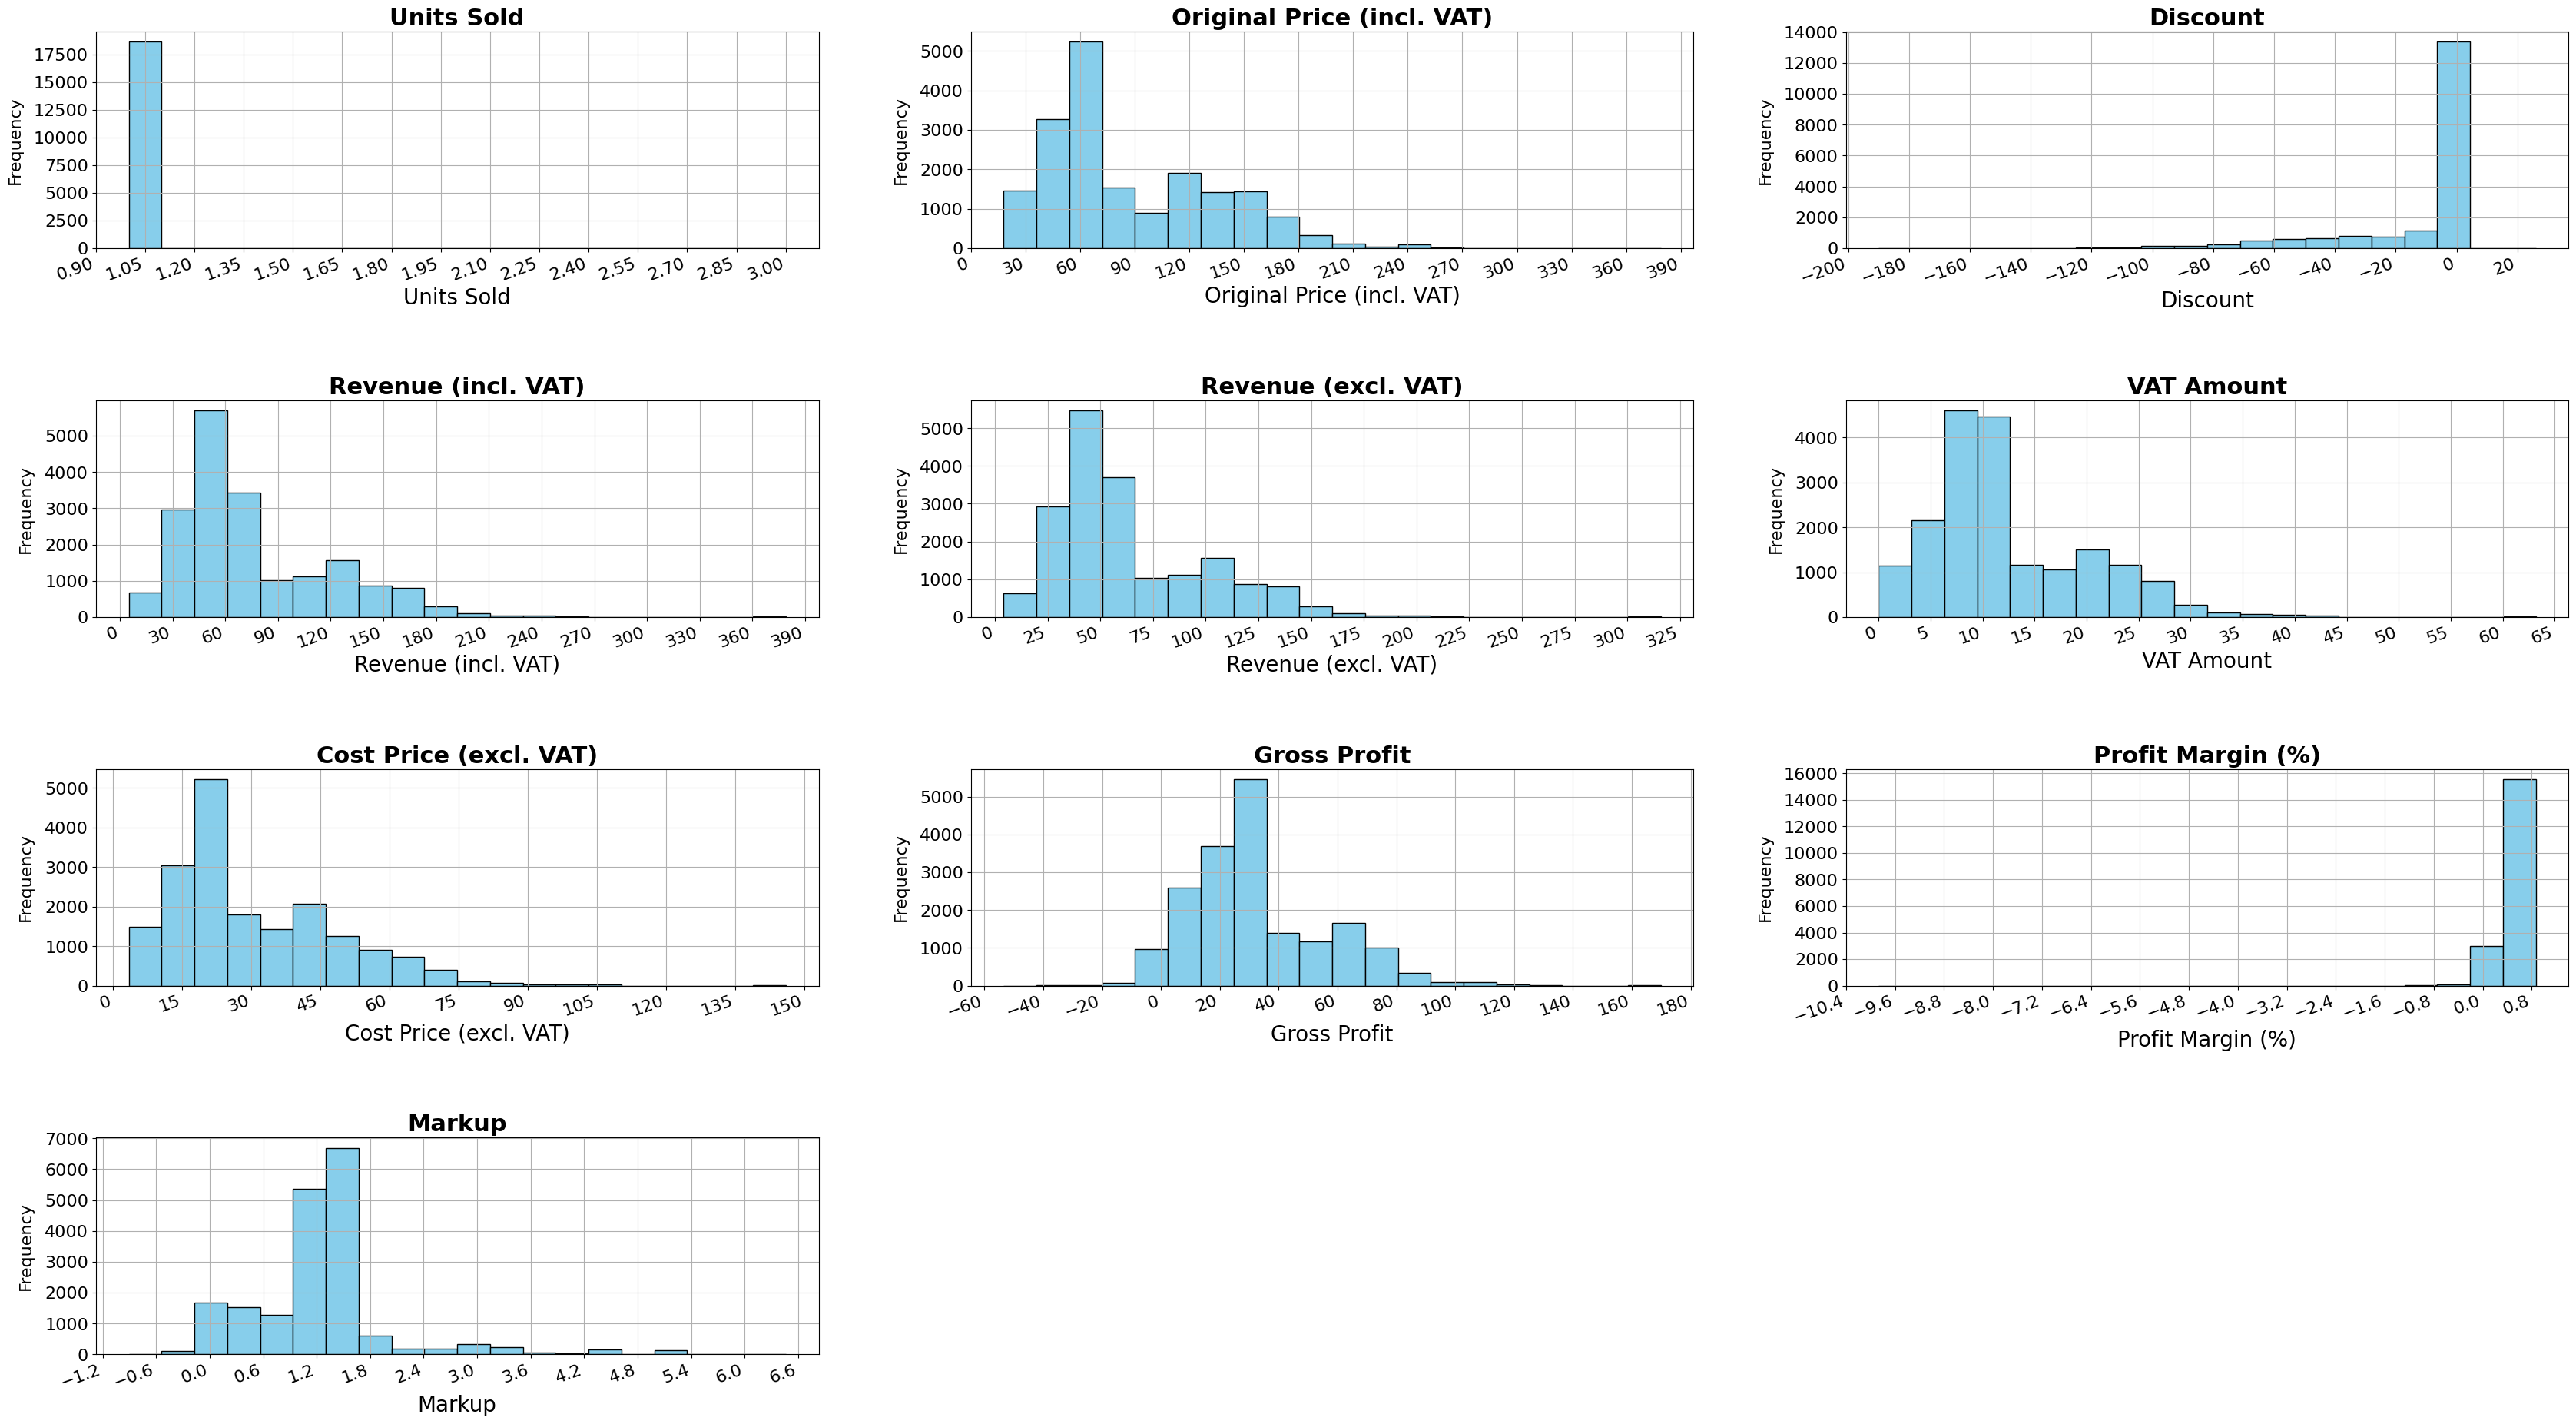

In [77]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator  # Import MaxNLocator

# List of numerical columns to plot
numerical_columns = sales_2017_2024_clean.select_dtypes(include=['float64']).columns

# Determine the number of rows and columns based on the number of plots
n_cols = 3
n_rows = -(-len(numerical_columns) // n_cols)  # This calculates the ceiling of len/n_cols

# Plot histograms for each numerical column
plt.figure(figsize=(35, 20))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(sales_2017_2024_clean[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'{column}', fontsize=22, fontweight='bold')
    plt.xlabel(column, fontsize=20)
    plt.ylabel('Frequency', fontsize=16, labelpad=10)
    plt.grid(True)  # Add grid for better readability
    plt.xticks(rotation=20, ha='right', fontsize=16)  # Rotate x-axis labels
    plt.yticks(fontsize=16)
    plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=15))  # Control the number of x-axis labels
    

plt.tight_layout(pad=6.0)  # Add more padding between subplots
plt.show()


These plots give a visual representation of the distribution of each variable, allowing to see how the data is spread and whether there are any noticeable patterns or anomalies. 

**Original Price**

The distribution of original prices is right-skewed, with most products priced below £150. There's a sharp drop-off after this point, indicating that higher-priced items are less common. The concentration of products in the lower price range suggests that the majority of sales come from more affordable items, potentially indicating a focus on mass-market products. The few high-priced items may cater to a niche segment.

The average non-sale price for items is £88, with prices ranging from £18 to £379, including VAT. Most non-sale prices seem to cluster around the £60-£70 range, accounting for nearly 4,000 items, followed by the £40-£50 range with 2,500 items, and just over 2,000 items in the £70-£80 range.

**Discount**

The discount distribution peaks around 0, indicating that many products were sold without any discount. There are instances of negative discounts (likely representing returns or adjustments) and positive discounts, though these are less frequent. The low frequency of significant discounts suggests that the business does not heavily rely on discounting as a strategy, or that discounts are applied selectively. The presence of negative discounts might reflect returns or transaction corrections.

The average discount per product is £12.26, with the highest discount given being £190.

**Revenue**

Similar to the original price, the revenue distribution is right-skewed. Most transactions generate revenue in the lower range, with fewer high-revenue transactions. This suggests that the bulk of revenue comes from a large number of low-value transactions, with fewer high-value transactions contributing to a smaller portion of the total revenue. This might indicate a business model that relies on high volume rather than high individual transaction value.

The average revenue per transaction, including VAT, is £76, with a range from £5 to £379. The highest revenue per transaction is in the £60-£70 range, with about 3,700 transactions, followed by the £50-£60 range with just over 3,000 transactions.

**VAT Amount**

The VAT amount distribution is right-skewed, with most transactions involving lower VAT amounts, corresponding to the lower price and revenue distributions. The VAT amount reflects the price structure, where the majority of transactions involve lower-priced items, leading to smaller VAT contributions. This aligns with the observation that the business primarily deals in lower-priced goods.

The average VAT amount per transaction is £12.26, with a range from £0 to £63. The lowest VAT amount likely corresponds to sales of children's items, which are exempt from VAT.

**Cost Price**

The cost price distribution shows that most products have a cost price below 50 units, with a long tail of higher-cost items. The lower cost of most products suggests efficient procurement or production strategies that keep costs low. The higher-cost items in the tail could represent premium products or those with higher production costs.

The average cost price per item is £31, with the lowest being £3.31 and the highest £146. The majority of products have a cost price in the £20-£30 range, accounting for about 3,400 items, followed by 2,600 items in the £30-£40 range, and 2,500 items in the £10-£20 range.

**Gross Profit**

The gross profit distribution is right-skewed, indicating that while most transactions yield lower gross profits, some result in significantly higher profits. The business appears to generate consistent, though relatively low, gross profits on most items, with occasional high-profit transactions possibly stemming from premium products or particularly profitable sales. This suggests a mix of high-margin and low-margin products in the inventory.

The average gross profit per transaction is £33, with a range from -£54 to £170. The highest gross profit is around £40 for about 3,700 transactions, followed by £50 for about 3,400 transactions.

**Profit Margin**

The profit margin percentage distribution is fairly balanced, with most transactions falling in the 40%-60% range, though there is some skew towards higher margins. A balanced distribution with a slight skew towards higher profit margins suggests that the business has a healthy pricing strategy, ensuring profitability across a wide range of products. The higher profit margins may indicate successful value-added sales or effective cost management.

The average profit margin per transaction is 49.4%, with a range from -98.6% to 86.5%.

**Markup**

The markup distribution is right-skewed, with most products having a markup below 2, though some products show significantly higher markups. This distribution suggests a consistent markup strategy, with occasional products marked up significantly more, possibly due to exclusivity, brand value, or high demand. This could indicate strategic pricing on certain items to maximize profitability.

The average markup is 124%, with a range from -90.7% to 646%. The highest markup is in the 140%-150% range for nearly 5,000 transactions, followed by 120%-130% for nearly 4,000 transactions.



Next, I will create box plots to help identify the spreads of the data and any outliers that might be present.

### 3.4 Box Plots

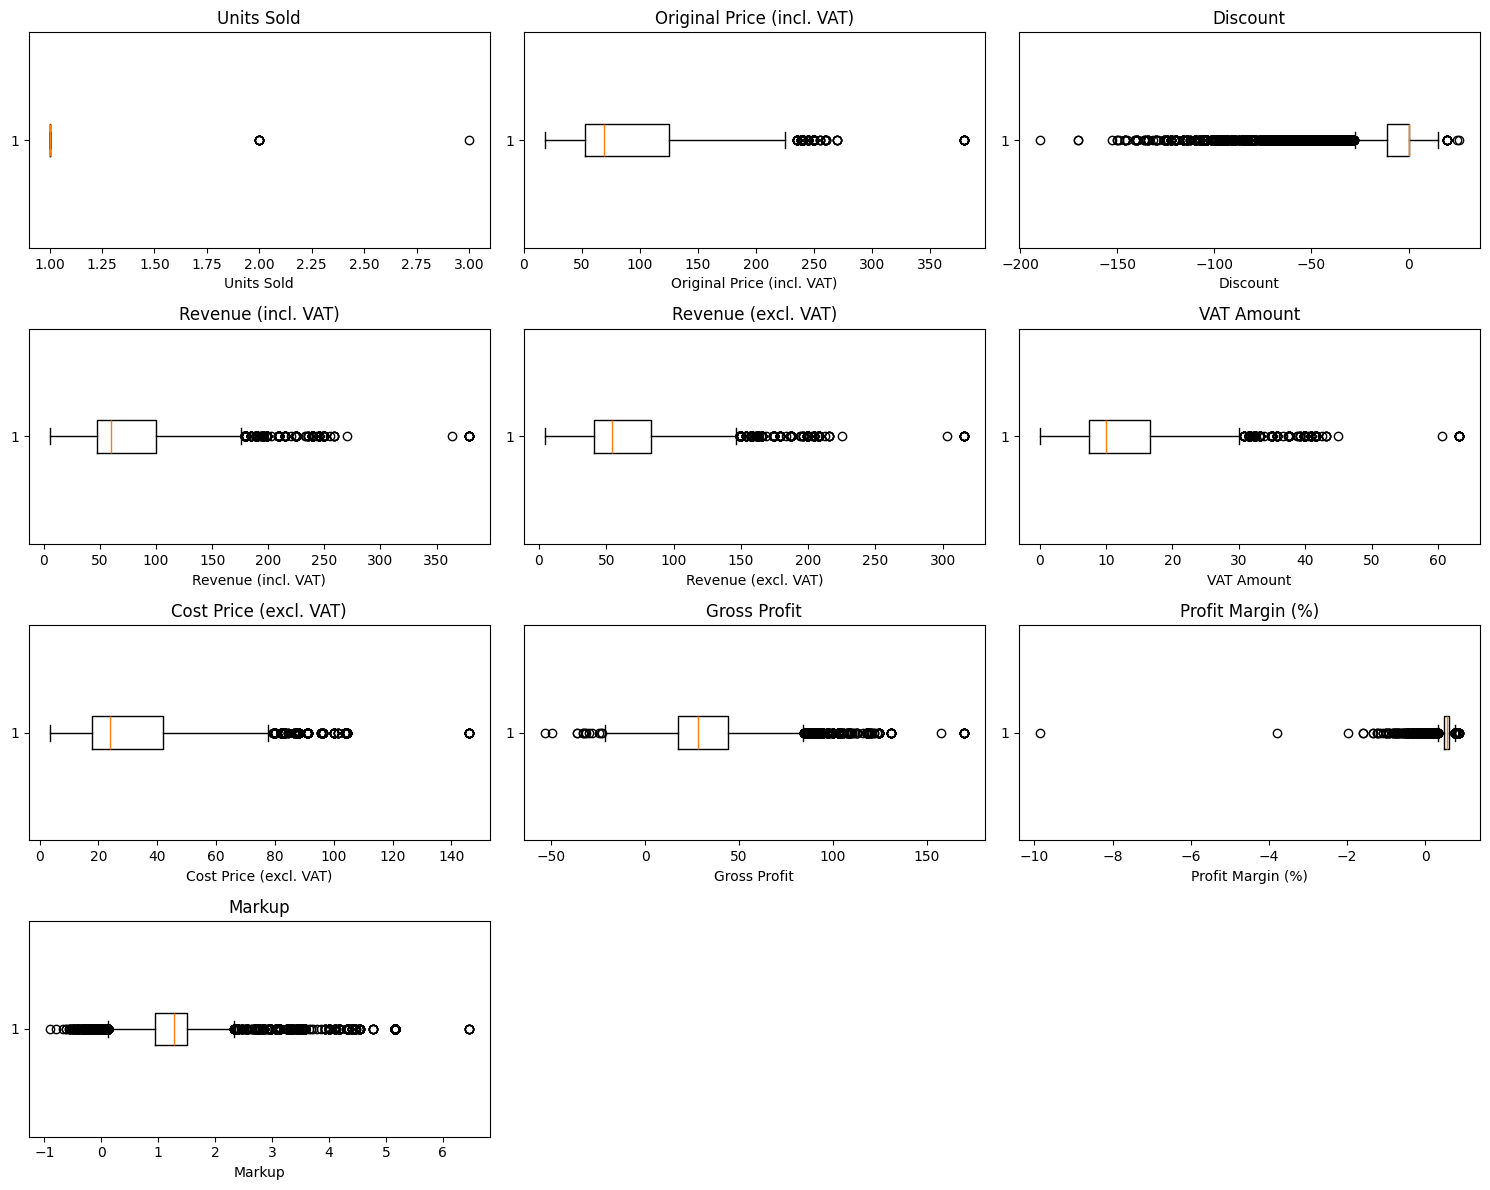

In [78]:
# Plot box plots for each numerical column
plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    plt.boxplot(sales_2017_2024_clean[column], vert=False)
    plt.title(f'{column}')
    plt.xlabel(column)
plt.tight_layout()
plt.show()


These plots are useful for visualising the spread of the data, identifying the median, and detecting any potential outliers.

**Observations from Box Plots**

Outliers: 

Several variables exhibit outliers, which are data points that lie far from the rest of the data. These could be worth investigating to understand their nature.

Spread: 

The interquartile range (IQR) in each plot shows the spread of the middle 50% of the data. Some variables have a wide IQR, indicating a diverse range of values.

### 3.5 Density Plots

The density plots help visualise the distribution of the data, showing the shape and any skewness in the numerical variables.

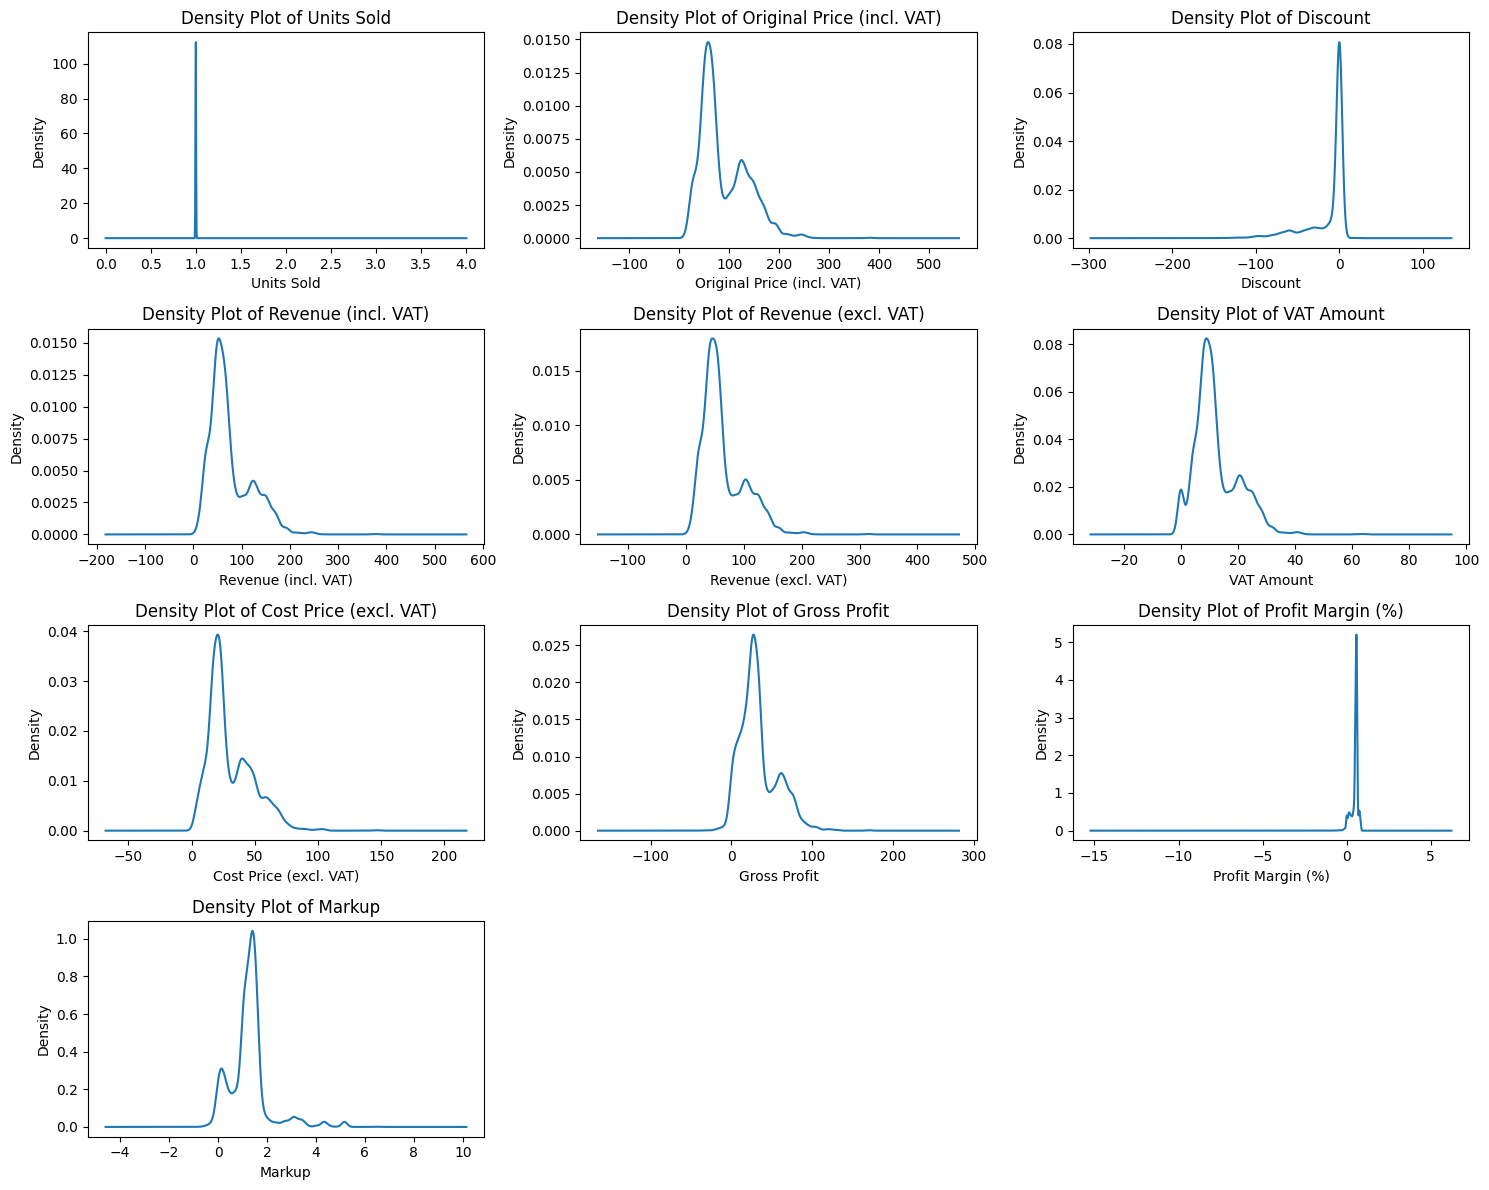

In [79]:
# Plot density plots for each numerical column
plt.figure(figsize=(15, 12))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(4, 3, i)
    sales_2017_2024_clean[column].plot(kind='density')
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
plt.ylabel('Density')
plt.tight_layout()
plt.show()


**Observations from Density Plots**

Skewness: 

Some variables exhibit skewed distributions, either to the left or right, which could indicate a concentration of data points in a particular range.

Multi-modality: 

A few variables may show multiple peaks, suggesting that the data might have several subgroups or clusters.

### 3.6 Identify Outliers

In this section, I will quantify the outliers detected in each numerical variable using Interquartile Range - IQR. I will then list the variables with significant outliers.

I will analyse the spread and skewness for each variable to understand how the data is distributed. Then, I will investigate the implications of this spread and skewness in the context of the data.

Further, I will assess the impact of outliers on key metrics like mean, median, and standard deviation.

In [80]:
# Function to identify outliers using IQR
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Identify outliers for each numerical column
outliers_dict = {}
for column in numerical_columns:
    outliers = detect_outliers_iqr(sales_2017_2024_clean, column)
    outliers_dict[column] = outliers.shape[0]  # Count the number of outliers

# Convert the outlier counts to a DataFrame for better visualization
outliers_df = pd.DataFrame(list(outliers_dict.items()), columns=['Variable', 'Number of Outliers'])

outliers_df


,Variable,Number of Outliers
0,Units Sold,8
1,Original Price (incl. VAT),133
2,Discount,3351
3,Revenue (incl. VAT),382
4,Revenue (excl. VAT),382
5,VAT Amount,312
6,Cost Price (excl. VAT),184
7,Gross Profit,479
8,Profit Margin (%),3508
9,Markup,2519


**Key Observations**

**Profit Margin (%) and Discount:**

These variables have the highest number of outliers, with 3,508 and 3,351 outliers, respectively. This suggests significant variability in these metrics.

**Markup:**

Also has a large number of outliers (2,519), indicating considerable variation in how much prices exceed costs.

**Revenue (incl. VAT and excl. VAT):** 

Both revenue variables show a moderate number of outliers (382), which might indicate unusual sales transactions.

**Original Price (incl. VAT):** 

Has 133 outliers, possibly due to extreme pricing variations.


Next, I will create a detailed box plot and distribution plot specifically for Profit Margin to better understand the outliers. I will then analyse the characteristics of these outliers to determine if they have common features, such as specific branches, products, or dates. Next, I will assess how these  outliers influence the mean, median, and other statistics of Profit Margin (%).

### 3.7 Outlier Analysis 

I will create a detailed box plot and distirbution plot specifically for Profit Margin to better understand the outliers. 

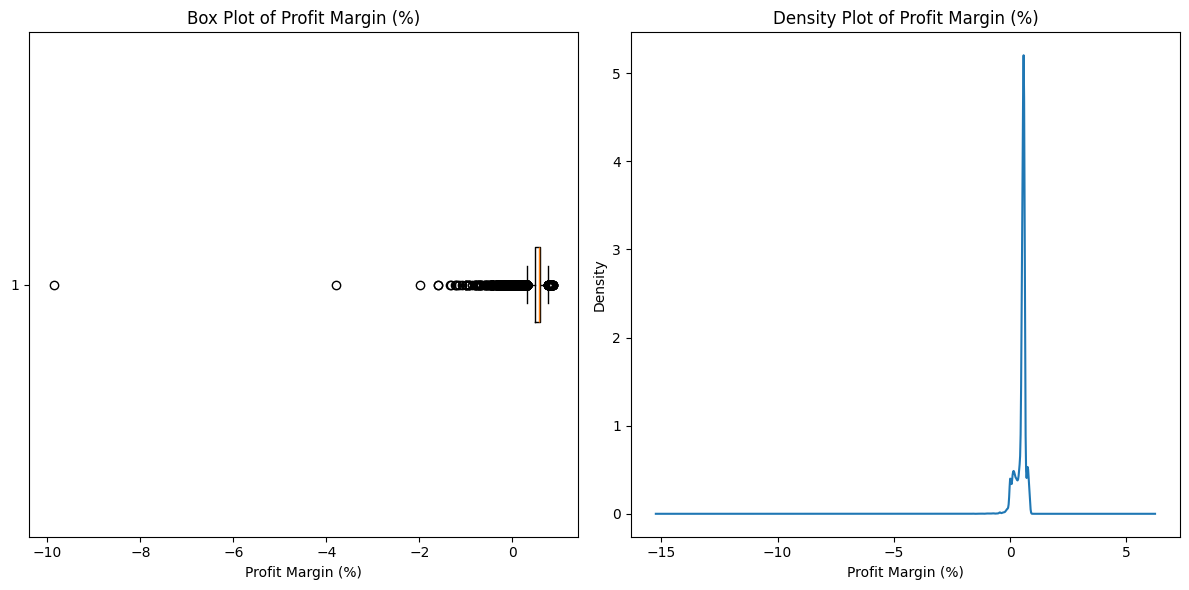

In [81]:
# Visualize the outliers for 'Profit Margin (%)'
plt.figure(figsize=(12, 6))

# Box plot
plt.subplot(1, 2, 1)
plt.boxplot(sales_2017_2024_clean['Profit Margin (%)'], vert=False)
plt.title('Box Plot of Profit Margin (%)')
plt.xlabel('Profit Margin (%)')

# Density plot
plt.subplot(1, 2, 2)
sales_2017_2024_clean['Profit Margin (%)'].plot(kind='density')
plt.title('Density Plot of Profit Margin (%)')
plt.xlabel('Profit Margin (%)')

plt.tight_layout()
plt.show()


**Visualizations Summary for Profit Margin (%)**

The box plot clearly shows a significant number of outliers, with many data points lying far outside the typical range of Profit Margin (%). These outliers appear on both the lower and upper ends of the distribution, indicating a wide variation in profit margins across different transactions.

The density plot shows a distribution that is somewhat skewed, with a peak around the median but with long tails on both sides, further confirming the presence of these outliers.

I will now look at the specific transactions that have these outlier profit margins to see if there any patterns (e.g. specific products, branches, or times of the year). Then, I will analyse how these outliers are affecting the overall statistics like mean, median and standard deviation. Based on the findings, we can decide whether to exclude, transofrm, or keep these outliers for further analysis. 

### 3.8 Outlier Characteristics in Profit Margin

In [82]:
# Extract the outliers for 'Profit Margin (%)'
Q1 = sales_2017_2024_clean['Profit Margin (%)'].quantile(0.25)
Q3 = sales_2017_2024_clean['Profit Margin (%)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
outliers_profit_margin = sales_2017_2024_clean[(sales_2017_2024_clean['Profit Margin (%)'] < lower_bound) | (sales_2017_2024_clean['Profit Margin (%)'] > upper_bound)]

# Analyze the outliers by some key columns: Branch Name, Product Category, etc.
outlier_analysis = outliers_profit_margin.groupby(['Branch Name', 'Product Category', 'Season Collection']).size().reset_index(name='Counts')
outlier_analysis.head()


,Branch Name,Product Category,Season Collection,Counts
0,Barnes,Accessories,(2021) AW,7
1,Barnes,Accessories,(2022) AW,3
2,Barnes,Accessories,(2023) AW,3
3,Barnes,Boys Footwear,(2021) AW,20
4,Barnes,Boys Footwear,(2021) SS,18


**Key Observations**

Product Categories: Categories like "Accessories" and "Boys Footwear" have several outliers, indicating significant variability in profit margins within these product groups.

Seasonality: The outliers are also distributed across different season collections, such as "(2021) AW" and "(2021) SS," which might point to seasonal influences on profit margins.

Next, I will analyse the impact of outliers on the average profit margin. First, I will compute the mean of the Profit Margin including all data points, Then I will remove the outliers and then compute the mean of the Profit Margin without them. Last, I will compare the two means to assess the impact of outliers on the average profit margin.

### 3.9 Impact of Outliers on Average Profit Margin

In [83]:
# Calculate the average profit margin with and without outliers
average_with_outliers = sales_2017_2024_clean['Profit Margin (%)'].mean()

# Remove outliers
data_without_outliers = sales_2017_2024_clean[(sales_2017_2024_clean['Profit Margin (%)'] >= lower_bound) & (sales_2017_2024_clean['Profit Margin (%)'] <= upper_bound)]
average_without_outliers = data_without_outliers['Profit Margin (%)'].mean()

impact_analysis = pd.DataFrame({
    'Metric': ['Average Profit Margin (with outliers)', 'Average Profit Margin (without outliers)'],
    'Value': [average_with_outliers, average_without_outliers]
})
impact_analysis


,Metric,Value
0,Average Profit Margin (with outliers),0.494237
1,Average Profit Margin (without outliers),0.561918


**Key Observations**

The presence of outliers reduces the average profit margin from 56.19% to 49.42%.
This significant difference suggests that the outliers are skewing the overall average downward, likely due to extreme low-profit or even loss-making transactions.

**Conclusion**

Outliers have a substantial impact on the average profit margin, lowering it by approximately 6.77 percentage points. This indicates that the extreme values, especially on the lower end, are pulling the average down, which might distort the overall profitability picture.

I will focus on further break down of the analysis and gaining deeper insights into the impact of outliers. I will identify specific products that are associated with extreme profit margins (both high and low) to see if certain products are driving the outliers. 

Then, I will examine whether specific times or dates (e.g. certain months, seasons, or years) are associated with the outliers. 

### 3.10 Product Level Analysis of Profit Margin Outliers 

Let's beging by performing the product-level analysis to see if certain products are more likely to be outliers in terms of profit margin.

In [84]:
# Product-level analysis: Identify products with the most outliers in profit margin
product_outlier_analysis = outliers_profit_margin.groupby(['Product Description', 'Product Category']).size().reset_index(name='Outlier Count')
product_outlier_analysis = product_outlier_analysis.sort_values(by='Outlier Count', ascending=False)
product_outlier_analysis.head(10)


,Product Description,Product Category,Outlier Count
136,18 Cheerful,Womens Sandals,151
151,18 Elly Tennis,Womens Sneakers,112
233,19 Cheerful 01,Womens Sandals,85
664,Wool Lined House Shoes,Womens Slippers,58
92,17 Ter Linen,Womens Espadrilles,31
69,17 Lloret 5,Womens Espadrilles,27
472,Horsebit Loafers 25-211,Womens Shoes,26
1,05.320 Suede Sachetto Wedge Pumps,Womens Shoes,24
585,Pebble,Womens Sandals,24
176,18 Lamfel,Womens Slippers,23


The table above lists the top products associated with the highest number of outliers in terms of profit margin. Here are some key insights:

**Top Outlier Products**

"18 Cheerful" (Womens Sandals): This product has the highest number of outliers, with 151 occurrences, indicating that this particular item frequently deviates significantly from typical profit margins.

"18 Elly Tennis" (Womens Sneakers): Another product with a high number of outliers (112), suggesting possible issues with pricing, cost, or demand variability.

"19 Cheerful 01" (Womens Sandals): Also shows a high number of outliers (85), which might indicate similar challenges as the "18 Cheerful" product.

**Category Trends**

Womens Sandals and Slippers: These categories appear frequently in the list, indicating that products in these categories may be more prone to having extreme profit margins, possibly due to seasonal trends, fashion cycles, or pricing strategies.


Next, I will analyse the outliers by the time of sale. I will explore how the outliers in profit margin are distributed across different time periods. Specifically, I will focus on:

1. Extracting relevant time information such as year, month, and quarter from the Transaction Date field.
2. Identify how outliers are distributed across different years.
3. Examine the distribution of outliers across different months to identify any seasonal patterns.
4. Analyse the quarterly distribution to see if any specific quarters show a higher occurance of outliers.

### 3.11 Time of Sale Analysis

Let's start by extracting the time of information and analysisng the outliers by year, month, and quarter.

In [85]:
# Convert 'Transaction Date' to datetime format
sales_2017_2024_clean['Transaction Date'] = pd.to_datetime(sales_2017_2024_clean['Transaction Date'])

/var/folders/c_/zrm23kf90kq51s4ydyjj12n00000gn/T/ipykernel_23637/4255226439.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  sales_2017_2024_clean['Transaction Date'] = pd.to_datetime(sales_2017_2024_clean['Transaction Date'])


In [86]:
# Extract year, month, and quarter from 'Transaction Date'
sales_2017_2024_clean['Year'] = sales_2017_2024_clean['Transaction Date'].dt.year
sales_2017_2024_clean['Month'] = sales_2017_2024_clean['Transaction Date'].dt.month
sales_2017_2024_clean['Quarter'] = sales_2017_2024_clean['Transaction Date'].dt.to_period('Q')

In [87]:
# Re-identify the outliers based on the newly added time columns
outliers_profit_margin = sales_2017_2024_clean[(sales_2017_2024_clean['Profit Margin (%)'] < lower_bound) | (sales_2017_2024_clean['Profit Margin (%)'] > upper_bound)]

In [88]:
# Group by year, month, and quarter to analyze the distribution of outliers
outliers_by_year = outliers_profit_margin.groupby('Year').size().reset_index(name='Outlier Count')
outliers_by_month = outliers_profit_margin.groupby('Month').size().reset_index(name='Outlier Count')
outliers_by_quarter = outliers_profit_margin.groupby('Quarter').size().reset_index(name='Outlier Count')

In [89]:
outliers_by_year

,Year,Outlier Count
0,2017,244
1,2018,652
2,2019,450
3,2020,293
4,2021,451
5,2022,621
6,2023,446
7,2024,351


**Outlier by Year**

2018: Had the highest number of outliers (652), followed by 2022 (621). This might indicate significant volatility in profit margins during these years.

2017 and 2020: These years had fewer outliers compared to others, possibly indicating more stable profit margins or less extreme pricing/sales strategies.

In [90]:
outliers_by_month

,Month,Outlier Count
0,1,363
1,2,365
2,3,268
3,4,232
4,5,244
5,6,295
6,7,446
7,8,441
8,9,419
9,10,230


**Outlier By Month**

July (Month 7): This month shows the highest concentration of outliers (427), indicating that transactions in July are more likely to deviate from typical profit margins.

August (Month 8): Also shows a high number of outliers (401), suggesting possible seasonal effects influencing profit margins during the summer.

December (Month 12): Has the fewest outliers (162), which might indicate more consistent pricing or profitability during this month, possibly due to holiday sales strategies.

In [91]:
outliers_by_quarter

,Quarter,Outlier Count
0,2017Q2,131
1,2017Q3,71
2,2017Q4,42
3,2018Q1,156
4,2018Q2,218
5,2018Q3,234
6,2018Q4,44
7,2019Q1,135
8,2019Q2,76
9,2019Q3,213


**Outliers by Quarter:**

2018Q3 and 2018Q2: Both quarters in 2018 have a high concentration of outliers (198 and 195, respectively), aligning with the annual trend observed for 2018.

2024Q1: This quarter in 2024 also shows a significant number of outliers (217), which might indicate early-year volatility.

2017Q1 and 2017Q4: These quarters show fewer outliers, again indicating more stable profit margins during these periods.

**Key Insights**

Seasonality

The higher concentration of outliers in mid-year months (July and August) and in specific years like 2018 and 2022 suggests seasonal or yearly influences that lead to more volatile profit margins.

Strategic Implications

Understanding these temporal patterns can help in refining pricing strategies, particularly in months or quarters where profit margins tend to deviate significantly.

Next, I will calculate the profit margin for the products, summarise the data by product level to compute the average profit margin for each products. This will give us insights into which products are more profitable and which may be underperforming.

### 3.12 Product Profit Margins

I will first aggregate the data by product description and product category. Then, I will compute the mean profit margin for each product. And then rank the products by their average profit margin to identify the most and least profitable products.

In [92]:
# Group the data by 'Product Description' and 'Product Category'
product_profit_margin = sales_2017_2024_clean.groupby(['Product Description', 'Product Category'])['Profit Margin (%)'].mean().reset_index()

# Sort the products by average profit margin in descending order
product_profit_margin = product_profit_margin.sort_values(by='Profit Margin (%)', ascending=False)
product_profit_margin.head(10)


,Product Description,Product Category,Profit Margin (%)
182,18 Elly Tennis,Womens Sneakers,0.811625
163,18 Cheerful,Womens Sandals,0.808447
30,17 Anna Femo,Womens Shoes,0.802144
330,19 Ter Linen,Womens Espadrilles,0.757380
222,18 NUMIS classic - KS,Womens Shoes,0.749289
285,19 Cheerful 01,Womens Sandals,0.749131
81,17 Konsa 09819 Suede,Womens Boots,0.735206
45,17 Birthe 47857 Suede,Womens Shoes,0.733848
423,28386-22,Womens Sandals,0.728766
96,17 Nebula Suede,Womens Shoes,0.727334


**Profit Margin Analysis by Product**

**Top 10 Most Profitable Products**

"18 Elly Tennis" (Womens Sneakers): Has the highest average profit margin at 81.16%.

"18 Cheerful" (Womens Sandals): Follows closely with a profit margin of 80.84%.

"17 Anna Femo" (Womens Shoes): Another highly profitable product with a margin of 80.21%.

These top products generally have high-profit margins, indicating that they are likely key contributors to overall profitability.


In [93]:
product_profit_margin.tail(10)

,Product Description,Product Category,Profit Margin (%)
528,Caitlin 1 Leather,Girls Footwear,0.000000
689,Kayak II G2,Mens Shoes,-0.030094
452,Alabama Combat Boots,Womens Boots,-0.036079
381,20 Kara 8491,Womens Shoes,-0.042056
186,18 Fakiri,Womens Sandals,-0.085680
365,20 Charly 8684,Womens Shoes,-0.119259
832,Phoebe 49938 Slingbacks,Womens Shoes,-0.193047
60,17 Desira 80809 Suede,Womens Boots,-0.194511
147,18 Andros BomBom,Womens Shoes,-0.225421
28,17 Anastasia Suede,Womens Shoes,-0.295230


**Bottom 10 Least Profitable Products**

"Caitlin 1 Leather" (Girls Footwear): Shows a profit margin of 0%, meaning this product is likely sold at cost.

"Kayak II G2" (Mens Shoes) and "Alabama Combat Boots" (Womens Boots): Both show negative profit margins, indicating a loss on these products.

"17 Anastasia Suede" (Womens Shoes): Has the lowest profit margin at -29.52%, suggesting this product may be heavily discounted or poorly priced.

**Insights**

The products with the highest profit margins are predominantly in the women's footwear categories, particularly sandals and sneakers.
The least profitable products include both women's and men's footwear, with some items being sold at a loss.

**Conclusion**

The product listed as outliers are in fact not outliers, they just have much higher profit margin than the rest of the products. This has been clarified and confirmed with the stakeholders.

### 3.13 Price Strategy Optimisation - Reccomendation

Steps to Optimize Pricing Strategy:

Identify Underperforming Products:

Loss-Making Products: Review products with negative profit margins. Investigate why these items are selling at a loss. Common reasons could include over-discounting, high costs, or low demand.

Zero or Low-Margin Products: Products with very low or zero profit margins should be analyzed for potential price increases or cost reductions.

Evaluate Price Elasticity of Demand:

Demand Analysis: Assess how sensitive your customers are to price changes. This can be done by analyzing historical sales data to see how changes in price affected sales volume.

Price Testing: Implement A/B testing with different price points to identify the optimal price that maximizes revenue without significantly reducing sales.

Segmented Pricing Strategy:

Customer Segmentation: Segment your customers based on factors like purchase history, demographics, and buying behavior. Tailor pricing strategies for different segments.

Product Segmentation: Differentiate pricing based on product categories or even individual products. High-demand or unique products might sustain higher prices, while more common items may benefit from competitive pricing.

Seasonal and Dynamic Pricing:

Seasonal Adjustments: Adjust prices based on seasonal demand. For instance, sandals might be priced higher in summer and discounted in winter.

Dynamic Pricing: Implement a dynamic pricing strategy that adjusts prices based on real-time demand, inventory levels, and competitor pricing.

Cost Management:

Cost Analysis: Review the cost structure of your products. Identify areas where costs can be reduced without compromising quality.
Supplier Negotiations: Work with suppliers to negotiate better terms or explore alternative suppliers for better pricing.

Competitor Analysis:

Market Positioning: Analyze competitor pricing to ensure your products are competitively priced within the market.

Benchmarking: Regularly benchmark your prices against competitors and adjust your strategy to maintain a competitive edge.

Promotions and Discounts:

Smart Discounting: Use discounts strategically. Avoid blanket discounts and instead focus on targeted promotions that drive volume without eroding margins.

Loyalty Programs: Implement loyalty programs that offer discounts or rewards to repeat customers, incentivizing them to buy more without broad price cuts.

Data-Driven Pricing Models:

Machine Learning Models: Use machine learning models to predict the impact of price changes on sales and profitability.

Analytics Tools: Leverage advanced analytics tools to continuously monitor and adjust pricing based on market trends, customer behavior, and sales data.

### 3.14 Findings from Descriptive Statistics for Negative Values

In [94]:
# Investigating the negative values in Discount, Gross Profit, and Profit Margin (%)
negative_discounts = sales_2017_2024_clean[sales_2017_2024_clean['Discount'] < 0]
negative_gross_profit = sales_2017_2024_clean[sales_2017_2024_clean['Gross Profit'] < 0]
negative_profit_margin = sales_2017_2024_clean[sales_2017_2024_clean['Profit Margin (%)'] < 0]

In [95]:
negative_discounts.describe()

,Transaction Date,Units Sold,Original Price (incl. VAT),Discount,Revenue (incl. VAT),Revenue (excl. VAT),VAT Amount,Cost Price (excl. VAT),Gross Profit,Profit Margin (%),Markup,Year,Month
count,6621,6621.0,6621.000000,6621.000000,6621.000000,6621.00000,6621.000000,6621.000000,6621.000000,6621.000000,6621.000000,6621.000000,6621.000000
mean,2020-07-09 19:17:13.581936128,1.0,92.086387,-34.589126,57.497262,48.03287,9.464392,30.470251,17.562619,0.349906,0.852490,2020.078236,5.839903
min,2017-03-13 13:13:40,1.0,19.000000,-190.000000,5.000000,4.17000,0.000000,3.380000,-53.480000,-9.867159,-0.907980,2017.000000,1.000000
25%,2018-10-02 15:44:39,1.0,55.000000,-55.000000,39.000000,32.50000,6.500000,17.050000,5.930000,0.161231,0.192223,2018.000000,3.000000
50%,2020-02-04 13:26:09,1.0,75.000000,-29.000000,50.000000,41.67000,8.330000,24.200000,15.770000,0.388571,0.635514,2020.000000,7.000000
75%,2022-02-12 17:21:03,1.0,125.000000,-10.000000,70.000000,58.33000,11.670000,42.800000,26.400000,0.547636,1.210610,2022.000000,8.000000
max,2024-07-15 12:05:33,1.0,379.000000,-0.010000,364.000000,303.33000,60.670000,146.020000,157.310000,0.819733,4.547337,2024.000000,12.000000
std,NaN,0.0,48.168647,29.385875,30.599504,25.42032,5.253382,18.418012,15.586476,0.294985,0.912043,2.064206,2.982332


**Negative Discounts**

* Count: 6,621 transactions with negative discounts.

* Mean Discount: -34.59, with a range from -190.00 to -0.01.

* These transactions typically resulted in a lower mean revenue (Revenue (incl. VAT)) of 57.50 compared to the overall dataset mean.

* Negative discounts indicate that the price was reduced by the discount amount, which is expected behavior.

The -190.00 discount, as we discovered in the process of data cleaning, is for a footwear that was heavily discounted due to clearance.

In [96]:
negative_gross_profit.describe()

,Transaction Date,Units Sold,Original Price (incl. VAT),Discount,Revenue (incl. VAT),Revenue (excl. VAT),VAT Amount,Cost Price (excl. VAT),Gross Profit,Profit Margin (%),Markup,Year,Month
count,379,379.0,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,2021-04-24 01:55:15.316622592,1.0,118.927388,-74.960739,43.966649,36.711425,7.255224,42.921372,-6.209947,-0.252062,-0.149532,2020.820580,6.411609
min,2017-09-08 15:13:15,1.0,19.500000,-190.000000,5.850000,4.880000,0.000000,6.500000,-53.480000,-9.867159,-0.907980,2017.000000,1.000000
25%,2019-08-31 15:13:09,1.0,89.000000,-99.000000,25.000000,20.830000,4.170000,28.240000,-7.880000,-0.267532,-0.211065,2019.000000,4.000000
50%,2021-07-03 12:55:01,1.0,119.000000,-70.000000,45.000000,37.500000,7.500000,42.800000,-3.670000,-0.113778,-0.102155,2021.000000,7.000000
75%,2023-03-07 14:21:49.500000,1.0,147.000000,-55.000000,50.000000,41.670000,8.330000,51.575000,-1.250000,-0.044167,-0.042299,2023.000000,9.000000
max,2024-06-29 18:21:58,1.0,255.000000,0.000000,125.000000,104.170000,20.830000,104.550000,-0.020000,-0.000436,-0.000436,2024.000000,12.000000
std,NaN,0.0,49.383957,31.577382,22.888864,19.007138,3.918805,19.370165,7.492600,0.602588,0.150844,1.982596,2.932120


Negative Gross Profit:

* Count: 379 transactions with negative gross profit.

* Mean Gross Profit: -6.21, with a range from -53.48 to -0.02.

These transactions typically have a lower mean revenue and a negative profit margin, indicating that these sales resulted in a loss. This could be due to heavy discounts, clearance sales, or pricing errors.

In [97]:
negative_profit_margin.describe()

,Transaction Date,Units Sold,Original Price (incl. VAT),Discount,Revenue (incl. VAT),Revenue (excl. VAT),VAT Amount,Cost Price (excl. VAT),Gross Profit,Profit Margin (%),Markup,Year,Month
count,379,379.0,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,2021-04-24 01:55:15.316622592,1.0,118.927388,-74.960739,43.966649,36.711425,7.255224,42.921372,-6.209947,-0.252062,-0.149532,2020.820580,6.411609
min,2017-09-08 15:13:15,1.0,19.500000,-190.000000,5.850000,4.880000,0.000000,6.500000,-53.480000,-9.867159,-0.907980,2017.000000,1.000000
25%,2019-08-31 15:13:09,1.0,89.000000,-99.000000,25.000000,20.830000,4.170000,28.240000,-7.880000,-0.267532,-0.211065,2019.000000,4.000000
50%,2021-07-03 12:55:01,1.0,119.000000,-70.000000,45.000000,37.500000,7.500000,42.800000,-3.670000,-0.113778,-0.102155,2021.000000,7.000000
75%,2023-03-07 14:21:49.500000,1.0,147.000000,-55.000000,50.000000,41.670000,8.330000,51.575000,-1.250000,-0.044167,-0.042299,2023.000000,9.000000
max,2024-06-29 18:21:58,1.0,255.000000,0.000000,125.000000,104.170000,20.830000,104.550000,-0.020000,-0.000436,-0.000436,2024.000000,12.000000
std,NaN,0.0,49.383957,31.577382,22.888864,19.007138,3.918805,19.370165,7.492600,0.602588,0.150844,1.982596,2.932120


Negative Profit Margin (%):

* Count: 379 transactions with negative profit margin.

* Mean Profit Margin: -25.21%, with a range from -986.72% to -0.04%.

Transactions with a negative profit margin indicate that the cost price exceeded the selling price after considering discounts, leading to a loss on these sales.

### 3.15 Distribution of Negative Discounts

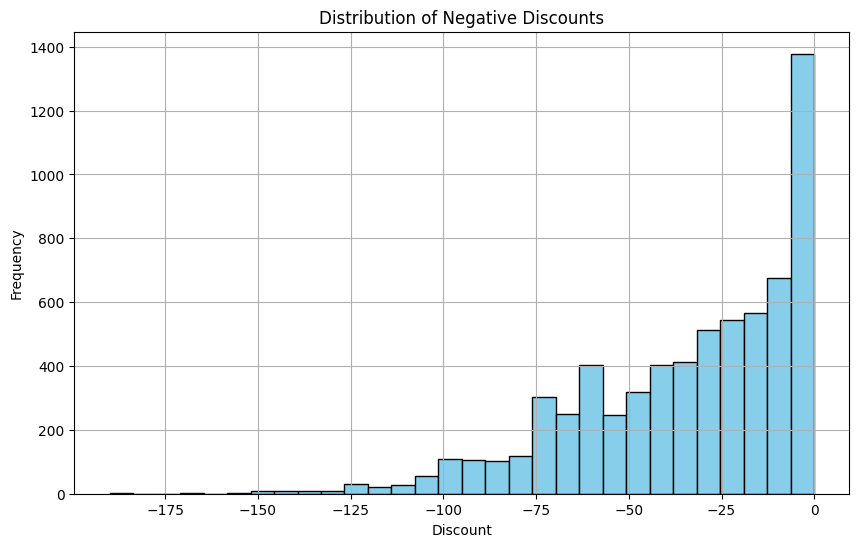

In [98]:
# Visualization 1: Distribution of Negative Discounts
plt.figure(figsize=(10, 6))
plt.hist(negative_discounts['Discount'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Negative Discounts')
plt.xlabel('Discount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Distribution of Negative Discounts:
The histogram shows that most negative discounts are clustered around smaller values, with a significant frequency of discounts around -10 to -55. Extreme negative discounts (e.g., -190) are less frequent but noticeable.


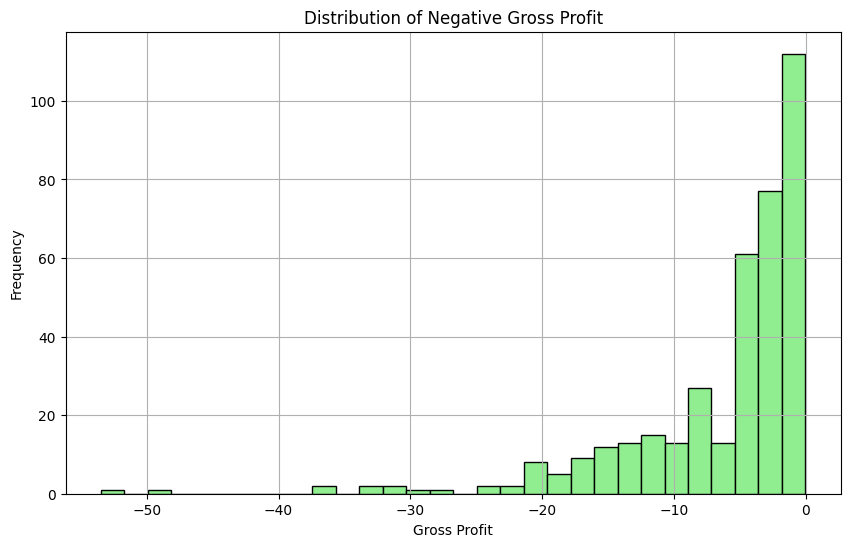

In [99]:
# Visualization 2: Distribution of Negative Gross Profit
plt.figure(figsize=(10, 6))
plt.hist(negative_gross_profit['Gross Profit'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Negative Gross Profit')
plt.xlabel('Gross Profit')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Distribution of Negative Gross Profit:

The distribution of negative gross profits reveals that most of these transactions incurred a small loss, typically in the range of -10 to -30. However, there are some extreme cases with larger losses.

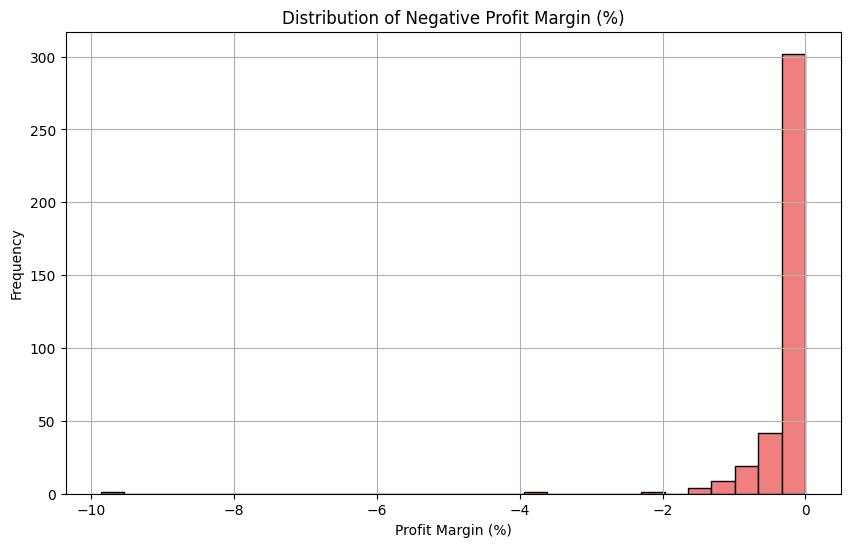

In [100]:
# Visualization 3: Distribution of Negative Profit Margin (%)
plt.figure(figsize=(10, 6))
plt.hist(negative_profit_margin['Profit Margin (%)'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribution of Negative Profit Margin (%)')
plt.xlabel('Profit Margin (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Distribution of Negative Profit Margin (%):
The negative profit margin distribution shows a concentration of transactions with margins around -10% to -30%. However, there are some transactions with extremely low margins (e.g., below -50%).

**Interpretation**

Negative Discounts

The concentration around smaller discounts indicates that while high discounts are present, they are relatively rare. This could suggest promotional sales or clearance events for products that did not perform well.


Negative Gross Profit and Profit Margin

The majority of losses are small, but the presence of larger losses indicates potential issues with pricing or targeted discounting strategies that need to be further examined.

### 3.16 Detailed Analysis of Specific Categories Contributing to Negative Values

In this section I will dive deeper into the categories that are contributing to these negative values.

In [101]:
# Investigate specific categories and transactions contributing to negative gross profit and profit margin
negative_gross_profit_categories = negative_gross_profit.groupby('Product Category').agg({
    'Gross Profit': ['count', 'mean', 'min', 'max'],
    'Profit Margin (%)': ['mean', 'min', 'max']
}).sort_values(('Gross Profit', 'count'), ascending=False)

negative_profit_margin_categories = negative_profit_margin.groupby('Product Category').agg({
    'Gross Profit': ['count', 'mean', 'min', 'max'],
    'Profit Margin (%)': ['mean', 'min', 'max']
}).sort_values(('Profit Margin (%)', 'mean'), ascending=False)

# Display the findings
negative_gross_profit_categories


Gross Profit                        Profit Margin (%)  \
                          count      mean    min   max              mean   
Product Category                                                           
Womens Shoes                148 -7.339054 -49.77 -0.07         -0.236042   
Womens Sandals               68 -5.899559 -23.30 -0.22         -0.287613   
Womens Boots                 45 -8.080667 -53.48 -0.20         -0.418298   
Womens Sneakers              42 -7.365238 -31.67 -0.13         -0.321968   
Womens Espadrilles           34 -1.753824  -9.07 -0.07         -0.108868   
Mens Shoes                   23 -3.533913  -7.69 -0.02         -0.118473   
Girls Footwear                6 -2.708333  -3.75 -1.25         -0.135417   
Mens Sandals                  5 -1.830000  -4.17 -0.27         -0.069493   
Womens Slippers               4 -3.667500  -5.75 -2.58         -0.172284   
Boys Footwear                 2 -1.250000  -1.25 -1.25         -0.055556   
Mens Boots                    1 -8.000000  -8.00 -8.00         -0.246154   
Mens Sneakers                 1 -1.770000  -1.77 -1.77         -0.060679   

                                        
                         min       max  
Product Category                        
Womens Shoes       -1.597216 -0.001527  
Womens Sandals     -1.220888 -0.010562  
Womens Boots       -9.867159 -0.001928  
Womens Sneakers    -3.801921 -0.001568  
Womens Espadrilles -1.088836 -0.003361  
Mens Shoes         -0.362907 -0.000436  
Girls Footwear     -0.187500 -0.062500  
Mens Sandals       -0.125113 -0.032413  
Womens Slippers    -0.230000 -0.152184  
Boys Footwear      -0.055556 -0.055556  
Mens Boots         -0.246154 -0.246154  
Mens Sneakers      -0.060679 -0.060679

**Categories with Negative Gross Profit**

Womens Shoes

* This category has the highest number of transactions with negative gross profit (148). The average loss is -7.34, with the worst loss being -49.77.

Womens Sandals, Boots, and Sneakers

* These categories also contribute significantly to negative gross profit, with average losses ranging from -5.90 to -8.08.

Mens Shoes

* This category shows fewer instances but still notable, with an average loss of -3.53.

In [102]:
negative_profit_margin_categories

Gross Profit                        Profit Margin (%)  \
                          count      mean    min   max              mean   
Product Category                                                           
Boys Footwear                 2 -1.250000  -1.25 -1.25         -0.055556   
Mens Sneakers                 1 -1.770000  -1.77 -1.77         -0.060679   
Mens Sandals                  5 -1.830000  -4.17 -0.27         -0.069493   
Womens Espadrilles           34 -1.753824  -9.07 -0.07         -0.108868   
Mens Shoes                   23 -3.533913  -7.69 -0.02         -0.118473   
Girls Footwear                6 -2.708333  -3.75 -1.25         -0.135417   
Womens Slippers               4 -3.667500  -5.75 -2.58         -0.172284   
Womens Shoes                148 -7.339054 -49.77 -0.07         -0.236042   
Mens Boots                    1 -8.000000  -8.00 -8.00         -0.246154   
Womens Sandals               68 -5.899559 -23.30 -0.22         -0.287613   
Womens Sneakers              42 -7.365238 -31.67 -0.13         -0.321968   
Womens Boots                 45 -8.080667 -53.48 -0.20         -0.418298   

                                        
                         min       max  
Product Category                        
Boys Footwear      -0.055556 -0.055556  
Mens Sneakers      -0.060679 -0.060679  
Mens Sandals       -0.125113 -0.032413  
Womens Espadrilles -1.088836 -0.003361  
Mens Shoes         -0.362907 -0.000436  
Girls Footwear     -0.187500 -0.062500  
Womens Slippers    -0.230000 -0.152184  
Womens Shoes       -1.597216 -0.001527  
Mens Boots         -0.246154 -0.246154  
Womens Sandals     -1.220888 -0.010562  
Womens Sneakers    -3.801921 -0.001568  
Womens Boots       -9.867159 -0.001928

**Categories with Negative Profit Margin (%)**

Womens Shoes

* Again, this category is a major contributor, with an average negative profit margin of -23.60%. The worst profit margin recorded is -159.72%.

Womens Boots and Sneakers 
* These categories also show significant negative profit margins, with averages of -41.83% and -32.20%, respectively.

Mens Sandals and Shoes 

* These categories have fewer transactions but still present negative profit margins, indicating potential pricing or discounting issues.

**Interpretation** 

The Womens Shoes category is consistently highlighted as a major contributor to negative financial performance, both in terms of gross profit and profit margin. This suggests that the products in this category might be heavily discounted or priced too low compared to their cost.

Other Womens Footwear categories (e.g., sandals, boots, and sneakers) also show signs of underperformance, which may indicate broader issues with the pricing strategy or market demand for these products.


### 3.17 Analysis of Worst-Performing Products Based on Gross Profit

In [103]:
# Further analysis on individual product performance within the underperforming categories (Womens Shoes, Sandals, Boots, Sneakers)

# Filter data for these specific categories
underperforming_categories = ['Womens Shoes', 'Womens Sandals', 'Womens Boots', 'Womens Sneakers']
underperforming_data = sales_2017_2024_clean[sales_2017_2024_clean['Product Category'].isin(underperforming_categories)]

In [104]:
# Group by Product Description to analyze product-level performance
product_performance = underperforming_data.groupby('Product Description').agg({
    'Units Sold': 'sum',
    'Original Price (incl. VAT)': 'mean',
    'Discount': 'mean',
    'Revenue (incl. VAT)': 'sum',
    'Gross Profit': ['sum', 'mean'],
    'Profit Margin (%)': ['mean', 'min', 'max'],
}).sort_values(('Gross Profit', 'sum'), ascending=True)

# Display the worst-performing products based on total gross profit
worst_performing_products = product_performance.head(10)
worst_performing_products

Units Sold Original Price (incl. VAT)    Discount  \
                            sum                       mean        mean   
Product Description                                                      
20 Charly 8684              9.0                      235.0 -130.944444   
18 Fakiri                   7.0                       60.0  -35.714286   
17 Bibara Woody             1.0                      165.0  -80.000000   
Meet Metal                  1.0                      215.0 -100.000000   
Cross Strap Wedges          3.0                       75.0  -37.500000   
Sunriver 25531              3.0                      185.0 -101.750000   
17 Cornelia 55745           3.0                      140.0  -71.000000   
17 Siren 61609              3.0                      145.0  -69.333333   
18 Andros BomBom           12.0                      110.0  -57.166667   
Ranch 063 Ankle Boot        5.0                      195.0 -102.750000   

                     Revenue (incl. VAT) Gross Profit             \
                                     sum          sum       mean   
Product Description                                                
20 Charly 8684                    936.50        -5.03  -0.558889   
18 Fakiri                         170.00         1.67   0.238571   
17 Bibara Woody                    85.00         9.03   9.030000   
Meet Metal                        115.00        15.83  15.830000   
Cross Strap Wedges                112.50        17.25   5.750000   
Sunriver 25531                    249.75        24.24   8.080000   
17 Cornelia 55745                 207.00        25.80   8.600000   
17 Siren 61609                    227.00        26.56   8.853333   
18 Andros BomBom                  634.00        26.72   2.226667   
Ranch 063 Ankle Boot              461.25        29.89   5.978000   

                     Profit Margin (%)                      
                                  mean       min       max  
Product Description                                         
20 Charly 8684               -0.119259 -1.327200  0.345459  
18 Fakiri                    -0.085680 -0.600000  0.200000  
17 Bibara Woody               0.127488  0.127488  0.127488  
Meet Metal                    0.165188  0.165188  0.165188  
Cross Strap Wedges            0.184000  0.184000  0.184000  
Sunriver 25531                0.116460  0.116460  0.116460  
17 Cornelia 55745             0.149565  0.149565  0.149565  
17 Siren 61609                0.044406 -0.327455  0.403281  
18 Andros BomBom             -0.225421 -1.006721  0.544017  
Ranch 063 Ankle Boot          0.074539  0.030494  0.140606

**Top 3 Worst-Performing Products**

* 20 Charly 8684: This product has sold 9 units, with an average discount of -130.94, resulting in a slight negative gross profit overall (-5.03). The profit margin is slightly negative (-11.93%), indicating that the discount strategy may be too aggressive for this product.

* 18 Fakiri: Sold 7 units with a high average discount of -35.71, resulting in a marginal positive gross profit (1.67) but a negative profit margin on average (-8.57%).

* 17 Bibara Woody: Sold only 1 unit, with a significant discount of -80. Despite the high discount, it managed a small positive gross profit (9.03), but this is a marginal case given the single transaction.

**Products with High Discounts but Positive Gross Profit**

* Meet Metal: Sold 1 unit, with a discount of -100. Despite this, it yielded a positive gross profit (15.83) and a profit margin of 16.52%, which may indicate that the product has a high markup or the initial price was set high enough to absorb such discounts.

* Ranch 063 Ankle Boot: Sold 5 units, with a significant discount of -102.75, but still managed a positive gross profit (29.89). The profit margin is modest at 7.45%, indicating that this product might still be profitable despite heavy discounting.

**Mixed Performance**

* 18 Andros BomBom: Sold 12 units with an average discount of -57.17. Despite generating a positive gross profit (26.72), the overall profit margin is negative (-22.54%), which suggests that while it brings in revenue, the costs and discounts are eroding profitability.

** Interpretation:**

Products like 20 Charly 8684 and 18 Fakiri are contributing to poor overall performance due to their high discounts, leading to negative or marginal gross profit and negative profit margins.

Some products, despite heavy discounting (e.g., Meet Metal and Ranch 063 Ankle Boot), manage to stay profitable, suggesting that the initial pricing strategy or cost structure is strong enough to withstand discounts.

## 4. Analysis

### 4.1 Correlation Matrix

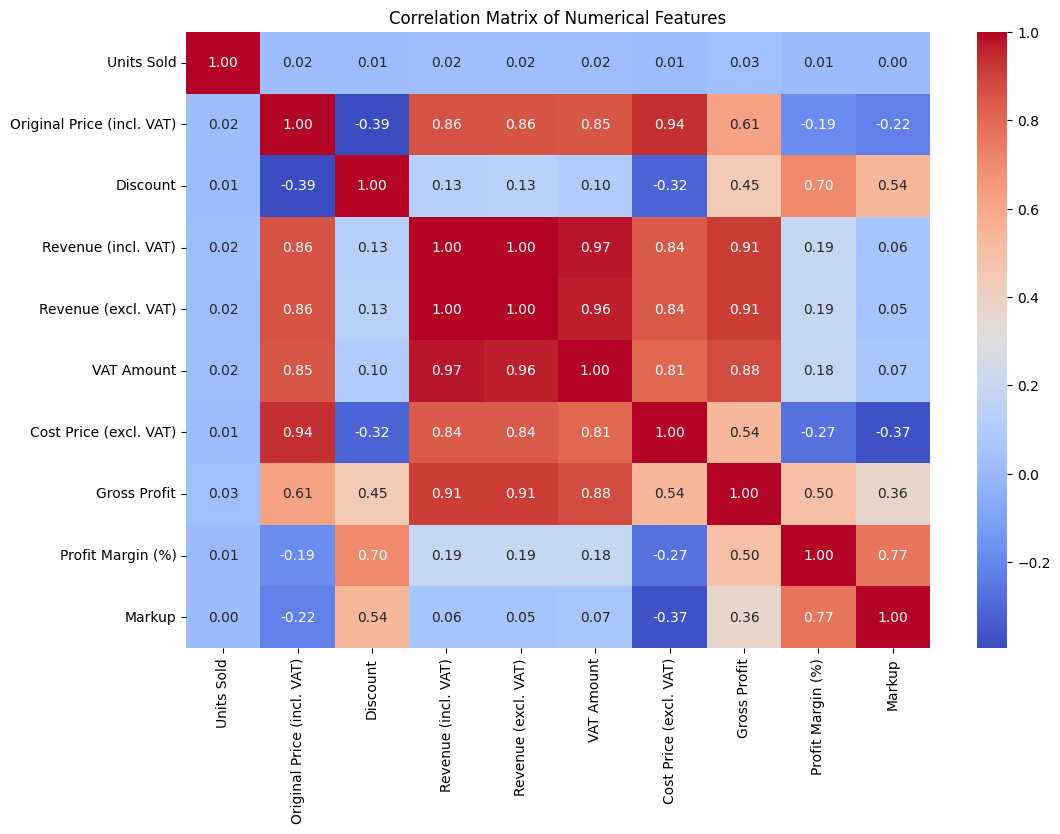

In [105]:
# Check correlations between numerical variables
correlation_matrix = sales_2017_2024_clean[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### 4.2 Time Series Analysis

We will start by analysing the sales trends over time, including identifying any seasonal patterns, year-over-year growth, and the impact of discounts on sales.

I will start by aggregating the sales data by month/year. Then analyse the overall sales trends. Followed by identifying any seasonality or trends in sales over the years and exame the impact of discounts on overall revenue.

In [106]:
# Aggregating the sales data by month and year
sales_2017_2024_clean['YearMonth'] = sales_2017_2024_clean['Transaction Date'].dt.to_period('M')
monthly_sales = sales_2017_2024_clean.groupby('YearMonth').agg({
    'Revenue (incl. VAT)': 'sum',
    'Discount': 'mean',
    'Units Sold': 'sum'
}).reset_index()

# Converting 'YearMonth' back to a datetime object for plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].dt.to_timestamp()

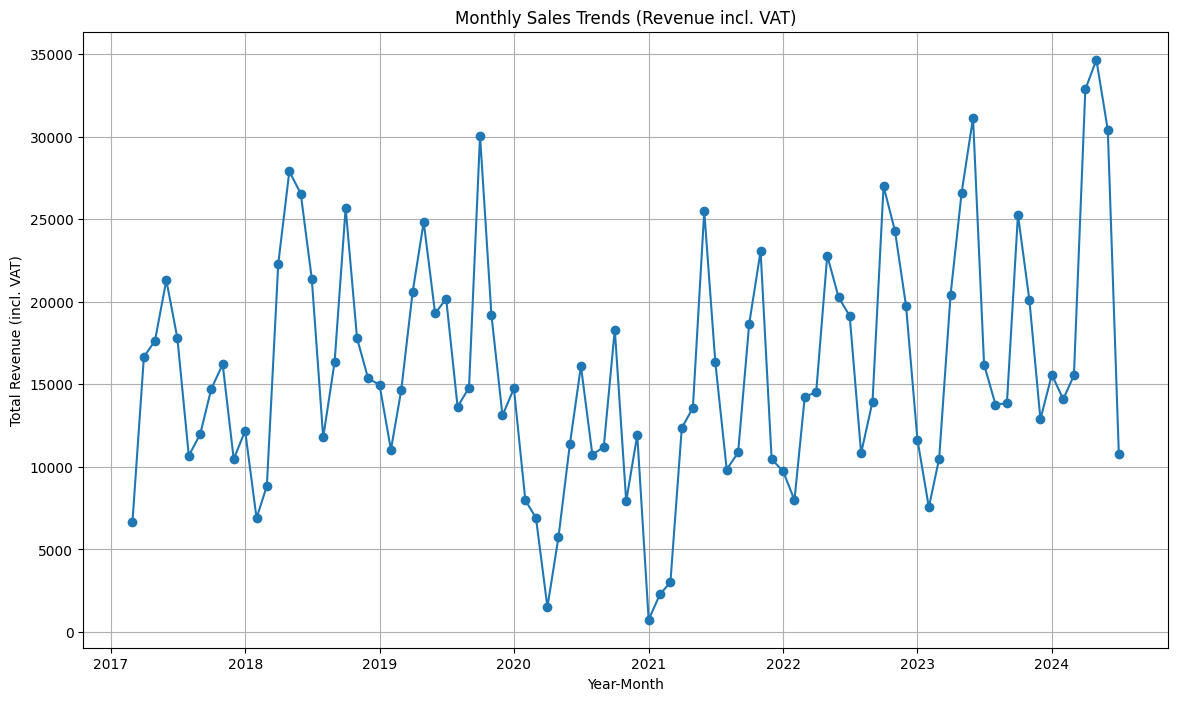

In [107]:
# Plotting overall sales trends
plt.figure(figsize=(14, 8))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Revenue (incl. VAT)'], marker='o')
plt.title('Monthly Sales Trends (Revenue incl. VAT)')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue (incl. VAT)')
plt.grid(True)
plt.show()

Monthly Sales Trends (Revenue incl. VAT):
The first plot shows the overall sales revenue over time. We can observe some fluctuations, with certain periods showing significant peaks, likely corresponding to seasonal sales events or promotions.
There is a noticeable upward trend in revenue over time, especially toward the later years, which may indicate business growth or increased sales during particular periods.

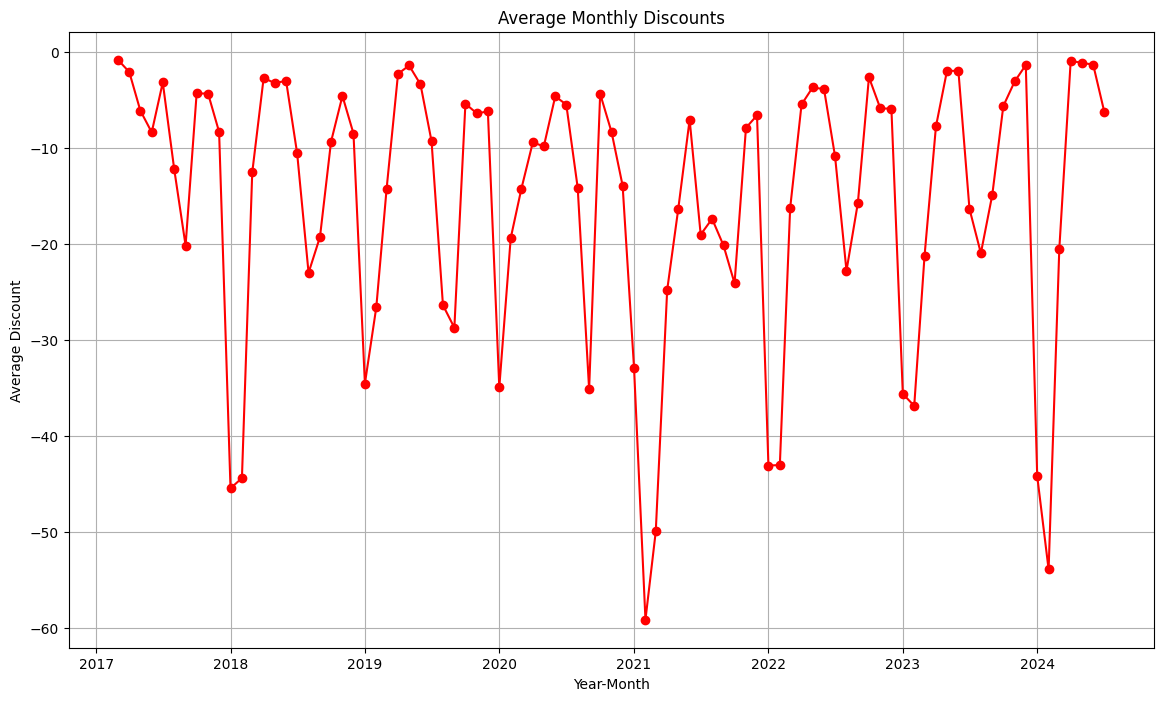

In [108]:
# Plotting average discount trends
plt.figure(figsize=(14, 8))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Discount'], color='red', marker='o')
plt.title('Average Monthly Discounts')
plt.xlabel('Year-Month')
plt.ylabel('Average Discount')
plt.grid(True)
plt.show()

Average Monthly Discounts:
The second plot indicates the average discounts applied over time. There are periods where discounts are significantly higher, likely during promotional events or clearance sales.
The trend suggests that discounting strategies vary, possibly aligning with specific marketing campaigns or seasonal clearances.

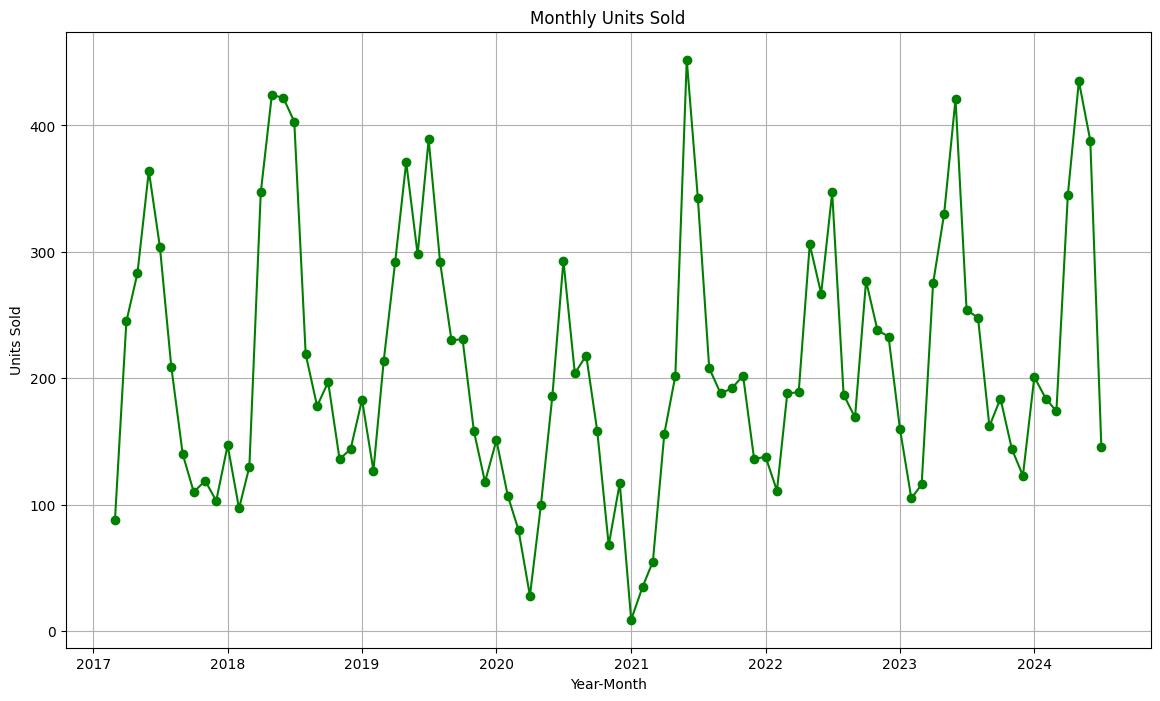

In [109]:
# Plotting units sold over time
plt.figure(figsize=(14, 8))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Units Sold'], color='green', marker='o')
plt.title('Monthly Units Sold')
plt.xlabel('Year-Month')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()

Monthly Units Sold:
The third plot shows the number of units sold each month. This also fluctuates, with peaks likely corresponding to the same periods as revenue peaks.
The number of units sold generally aligns with the revenue trends, indicating consistent performance in terms of volume, with increases during peak sales periods.

### 4.3 Distribution of Revenue

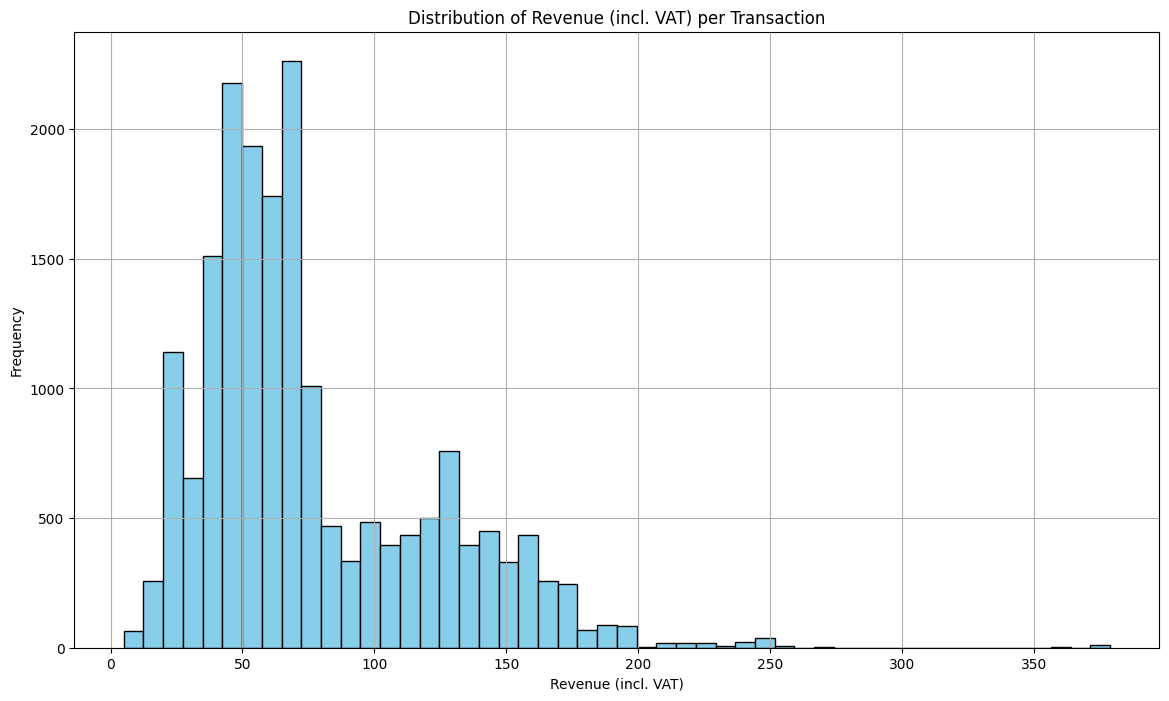

In [110]:
# Analyzing revenue distribution to identify high-revenue-generating transactions
high_revenue_transactions = sales_2017_2024_clean.sort_values('Revenue (incl. VAT)', ascending=False).head(10)

# Summary of revenue distribution
revenue_distribution = sales_2017_2024_clean['Revenue (incl. VAT)'].describe()

# Plotting the distribution of revenue
plt.figure(figsize=(14, 8))
plt.hist(sales_2017_2024_clean['Revenue (incl. VAT)'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Revenue (incl. VAT) per Transaction')
plt.xlabel('Revenue (incl. VAT)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Revenue Distribution:
The histogram shows that the majority of transactions generate revenue in the range of £5 to £100. There are fewer high-revenue transactions, with a maximum of £379 per transaction.
The average revenue per transaction is approximately £75.83, with a median of £60. This indicates that most transactions are clustered around these values.

In [111]:
# Displaying the top 10 high-revenue-generating transactions
high_revenue_transactions

,Transaction Date,Branch Name,Product Description,Product Category,Product Subcategory,Brand Name,Season Collection,Style Code,Product Size,Product Color,...,VAT Amount,Cost Price (excl. VAT),Gross Profit,Profit Margin (%),Markup,Online Sale,Year,Month,Quarter,YearMonth
16426,2023-10-21 13:09:43,Barnes,Rain 200,Womens Coats,Rain Coats (Long),Ilse Jacobsen,(2023) AW,Rain 200,40,Army 410,...,63.17,146.02,169.81,0.537663,1.162923,False,2023,10,2023Q4,2023-10
16526,2023-11-06 13:52:44,Barnes,Rain 200,Womens Coats,Rain Coats (Long),Ilse Jacobsen,(2023) AW,Rain 200,40,Dark Indigo,...,63.17,146.02,169.81,0.537663,1.162923,False,2023,11,2023Q4,2023-11
16795,2024-01-06 16:34:55,Barnes,Rain 200,Womens Coats,Rain Coats (Long),Ilse Jacobsen,(2023) AW,Rain 200,40,Army 410,...,63.17,146.02,169.81,0.537663,1.162923,False,2024,1,2024Q1,2024-01
16466,2023-10-26 17:29:43,Barnes,Rain 200,Womens Coats,Rain Coats (Long),Ilse Jacobsen,(2023) AW,Rain 200,38,Dark Indigo,...,63.17,146.02,169.81,0.537663,1.162923,False,2023,10,2023Q4,2023-10
16511,2023-11-04 12:45:02,Barnes,Rain 200,Womens Coats,Rain Coats (Long),Ilse Jacobsen,(2023) AW,Rain 200,38,Army 410,...,63.17,146.02,169.81,0.537663,1.162923,False,2023,11,2023Q4,2023-11
18247,2024-03-13 17:40:40,Haslemere,Rain 200,Womens Coats,Rain Coats (Long),Ilse Jacobsen,(2023) AW,Rain 200,36,Dark Indigo,...,63.17,146.02,169.81,0.537663,1.162923,False,2024,3,2024Q1,2024-03
16540,2023-11-09 13:59:37,Barnes,Rain 200,Womens Coats,Rain Coats (Long),Ilse Jacobsen,(2023) AW,Rain 200,38,Black 001,...,63.17,146.02,169.81,0.537663,1.162923,False,2023,11,2023Q4,2023-11
17109,2024-02-22 12:12:38,Barnes,Rain 200,Womens Coats,Rain Coats (Long),Ilse Jacobsen,(2023) AW,Rain 200,36,Army 410,...,63.17,146.02,169.81,0.537663,1.162923,False,2024,2,2024Q1,2024-02
16493,2023-10-31 15:54:42,Barnes,Rain 200,Womens Coats,Rain Coats (Long),Ilse Jacobsen,(2023) AW,Rain 200,40,Black 001,...,63.17,146.02,169.81,0.537663,1.162923,False,2023,10,2023Q4,2023-10
17099,2024-02-20 15:42:15,Barnes,Rain 200,Womens Coats,Rain Coats (Long),Ilse Jacobsen,(2023) AW,Rain 200,38,Black 001,...,63.17,146.02,169.81,0.537663,1.162923,False,2024,2,2024Q1,2024-02


In [112]:
revenue_distribution

count    18636.000000
mean        75.834710
std         43.550092
min          5.000000
25%         47.500000
50%         60.000000
75%         99.990000
max        379.000000
Name: Revenue (incl. VAT), dtype: float64

High-Revenue-Generating Transactions:
The top 10 high-revenue transactions all involve the same product: "Rain 200" from the Womens Coats category.

Each of these transactions generated £379 in revenue, with a consistent profit margin of 53.77%. These transactions are likely full-price sales, as no discounts were applied.

The consistent performance across these transactions suggests that this product is a top performer, contributing significantly to revenue and profit margins.

Next, I will dive deeper into the category-level performance. We will analyse which product categories are driving the most revenue and profit, and examine profit margins across these categories.

### 4.4 Category Analysis

### 4.5 Sales Performance

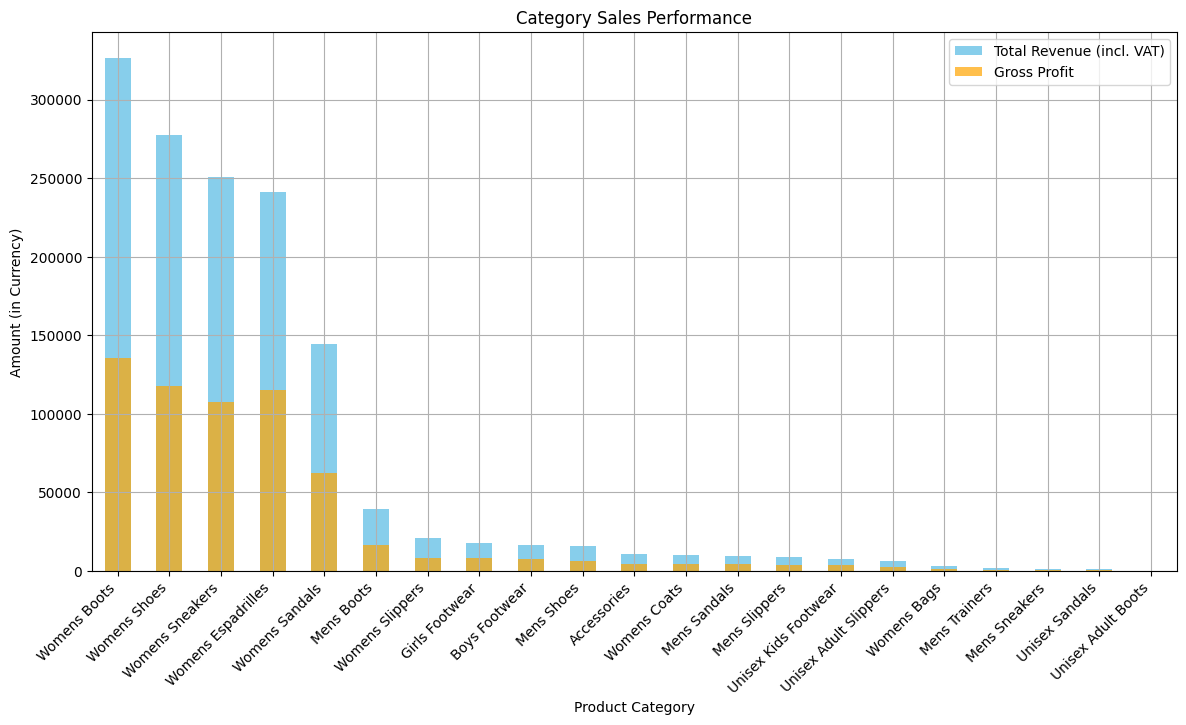

,Revenue (incl. VAT),Gross Profit
Product Category,,
Womens Boots,326661.67,135402.26
Womens Shoes,277378.28,117680.76
Womens Sneakers,250839.71,107336.31
Womens Espadrilles,241388.11,115285.90
Womens Sandals,144150.42,62547.60
Mens Boots,39606.90,16698.56
Womens Slippers,20958.71,8383.89
Girls Footwear,17819.42,8159.15
Boys Footwear,16573.82,7700.57


In [113]:
# Aggregate revenue and gross profit by product category
category_performance = sales_2017_2024_clean.groupby('Product Category').agg({
    'Revenue (incl. VAT)': 'sum',
    'Gross Profit': 'sum'
}).sort_values(by='Revenue (incl. VAT)', ascending=False)

# Plotting the total revenue and gross profit for each category
plt.figure(figsize=(14, 7))
category_performance['Revenue (incl. VAT)'].plot(kind='bar', color='skyblue', label='Total Revenue (incl. VAT)')
category_performance['Gross Profit'].plot(kind='bar', color='orange', alpha=0.7, label='Gross Profit')
plt.title('Category Sales Performance')
plt.xlabel('Product Category')
plt.ylabel('Amount (in Currency)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

category_performance


**Observations**

The bar chart above visualizes the total revenue and gross profit across different product categories. 

**Top Performing Categories**

* Womens Boots: The highest revenue generator with a total revenue of approximately £326,661 and gross profit of £135,402.

* Womens Shoes and Womens Sneakers: Also significant contributors to the total revenue and profit, with revenues of £277,378 and £250,839, respectively.

**Lower Performing Categories**

* Unisex Adult Boots and Unisex Sandals: These categories have the lowest revenues and profits, indicating potentially lower demand or fewer products available.

### 4.6 Branch Performance

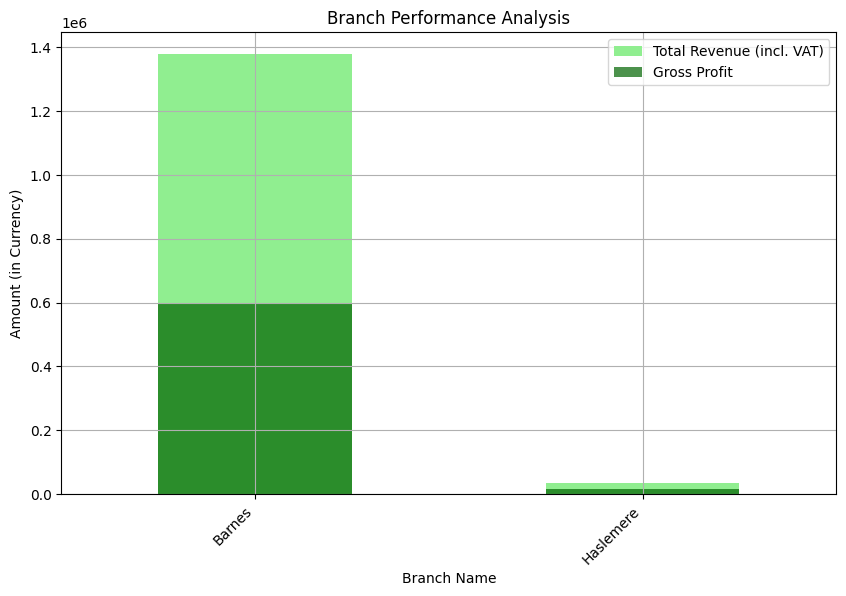

,Revenue (incl. VAT),Gross Profit
Branch Name,,
Barnes,1377896.11,596381.11
Haslemere,35359.55,16800.88


In [114]:
# Aggregate revenue and gross profit by branch
branch_performance = sales_2017_2024_clean.groupby('Branch Name').agg({
    'Revenue (incl. VAT)': 'sum',
    'Gross Profit': 'sum'
}).sort_values(by='Revenue (incl. VAT)', ascending=False)

# Plotting the total revenue and gross profit for each branch
plt.figure(figsize=(10, 6))
branch_performance['Revenue (incl. VAT)'].plot(kind='bar', color='lightgreen', label='Total Revenue (incl. VAT)')
branch_performance['Gross Profit'].plot(kind='bar', color='darkgreen', alpha=0.7, label='Gross Profit')
plt.title('Branch Performance Analysis')
plt.xlabel('Branch Name')
plt.ylabel('Amount (in Currency)')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

branch_performance


**Observations**
The bar chart above provides a comparison of the performance between branches in terms of total revenue and gross profit. 

* Barnes Branch - Significantly outperforms the other branch with total revenue of approximately £1,377,896 and gross profit of £596,381.

* Haslemere Branch - Generates much lower revenue and profit compared to Barnes, with a total revenue of £35,359 and gross profit of £16,800.

### 4.7 Profitability Analysis

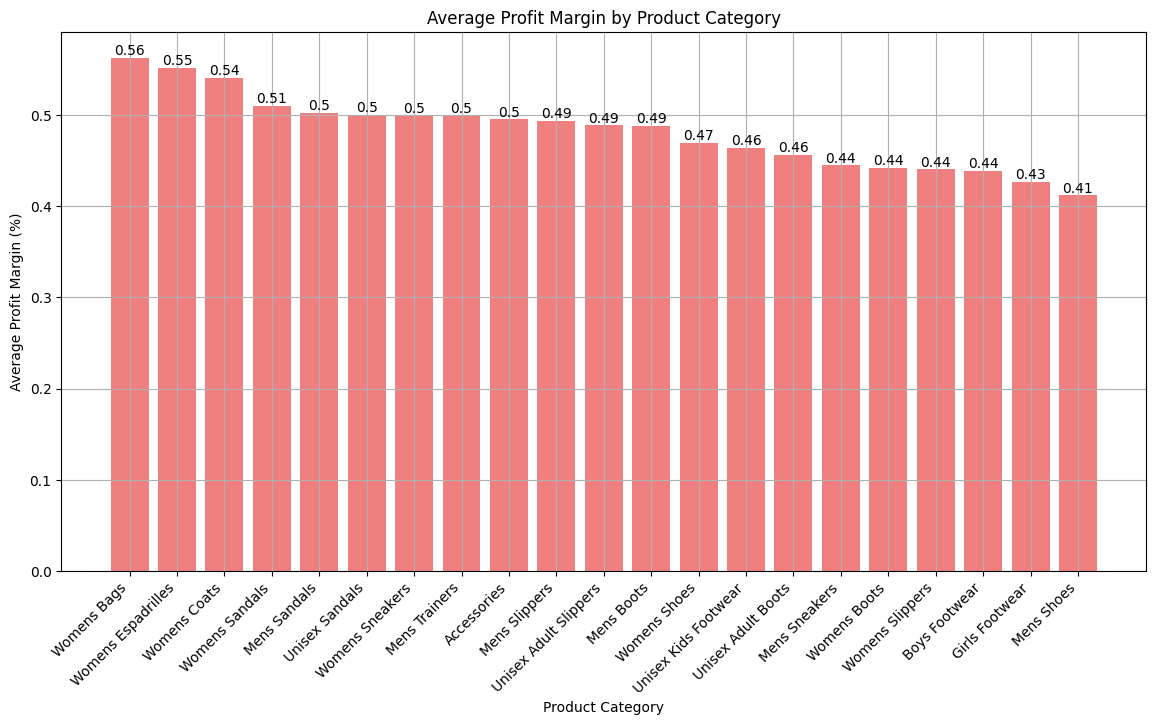

Product Category
Womens Bags              0.562860
Womens Espadrilles       0.551628
Womens Coats             0.541101
Womens Sandals           0.509926
Mens Sandals             0.502239
Unisex Sandals           0.500000
Womens Sneakers          0.499601
Mens Trainers            0.498960
Accessories              0.495129
Mens Slippers            0.493683
Unisex Adult Slippers    0.488807
Mens Boots               0.487832
Womens Shoes             0.469408
Unisex Kids Footwear     0.464299
Unisex Adult Boots       0.456483
Mens Sneakers            0.444731
Womens Boots             0.442307
Womens Slippers          0.440552
Boys Footwear            0.438707
Girls Footwear           0.427011
Mens Shoes               0.411965
Name: Profit Margin (%), dtype: float64

In [115]:
# Calculate the average profit margin by product category and branch
profitability_category = sales_2017_2024_clean.groupby('Product Category')['Profit Margin (%)'].mean().sort_values(ascending=False)
profitability_branch = sales_2017_2024_clean.groupby('Branch Name')['Profit Margin (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 7))
bars = plt.bar(profitability_category.index, profitability_category, color='lightcoral')
plt.title('Average Profit Margin by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Profit Margin (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

# Adding the value on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

profitability_category

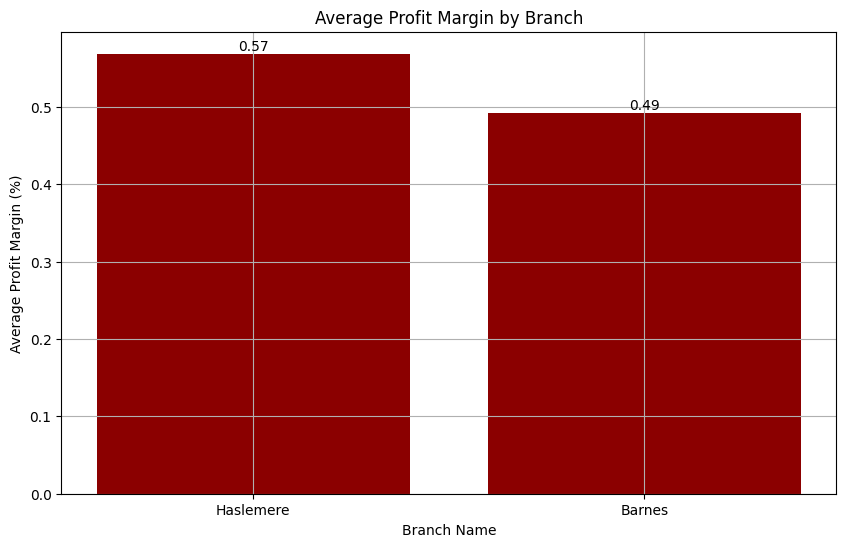

Branch Name
Haslemere    0.568790
Barnes       0.492594
Name: Profit Margin (%), dtype: float64

In [116]:
# Plotting the average profit margin by branch with values on each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(profitability_branch.index, profitability_branch, color='darkred')
plt.title('Average Profit Margin by Branch')
plt.xlabel('Branch Name')
plt.ylabel('Average Profit Margin (%)')
plt.xticks(rotation=0)
plt.grid(True)

# Adding the value on each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

profitability_branch

**Observations**

Profitability Analysis

Profit Margin by Product Category

**Highest Profit Margins**
* Womens Bags: Leads with an average profit margin of approximately 56.3%.

* Womens Espadrilles and Womens Coats: Also show strong profitability with margins around 55.2% and 54.1%, respectively.

**Lower Profit Margins**
* Mens Shoes: The lowest average profit margin of about 41.2%.

* Girls Footwear and Boys Footwear: Also have lower profit margins, around 42.7% and 43.9%, respectively.

**Profit Margin by Branch**

Haslemere Branch exhibits a higher average profit margin (approximately 56.9%) compared to the Barnes branch.

Barnes Branch - Despite its higher revenue, the average profit margin is lower at approximately 49.3%.

This analysis indicates that while the Barnes branch is driving the majority of the revenue, the Haslemere branch is slightly more profitable on a per-sale basis.


### 4.8 Discount Impact on Sales

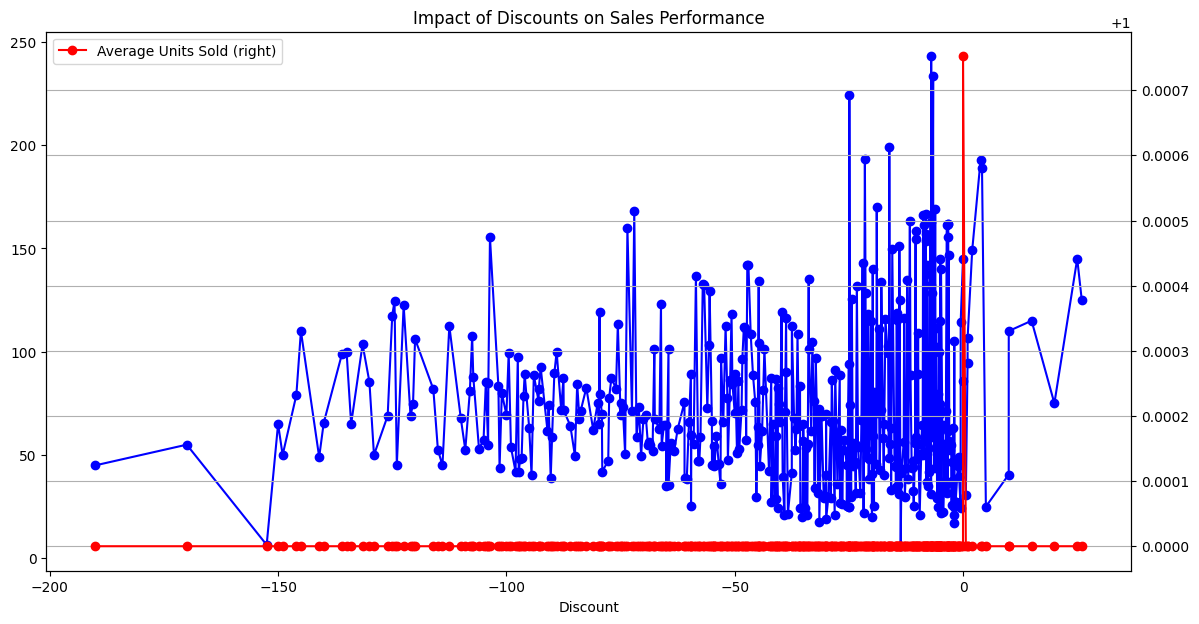

,Revenue (incl. VAT),Units Sold
Discount,,
-190.00,45.0,1.0
-170.00,55.0,1.0
-152.50,6.5,1.0
-150.00,65.0,1.0
-149.00,50.0,1.0
...,...,...
10.01,110.0,1.0
15.01,115.0,1.0
20.00,75.0,1.0


In [117]:
# Calculate the relationship between discount and revenue
discount_impact = sales_2017_2024_clean.groupby('Discount').agg({
    'Revenue (incl. VAT)': 'mean',
    'Units Sold': 'mean'
}).sort_values(by='Discount', ascending=True)

# Plotting the impact of discounts on average revenue and units sold
plt.figure(figsize=(14, 7))
discount_impact['Revenue (incl. VAT)'].plot(kind='line', marker='o', color='blue', label='Average Revenue (incl. VAT)')
discount_impact['Units Sold'].plot(kind='line', marker='o', color='red', label='Average Units Sold', secondary_y=True)
plt.title('Impact of Discounts on Sales Performance')
plt.xlabel('Discount')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

discount_impact


**Observations**

The line chart above illustrates the relationship between discounts and sales performance, focusing on average revenue and units sold per transaction. Here are the key insights:

**Revenue Trends**

There is no straightforward trend between discount size and average revenue per transaction. The data shows variability in revenue regardless of the discount applied.

**Units Sold**

Similarly, the number of units sold does not exhibit a consistent increase or decrease with varying discount levels. This suggests that discounts alone do not have a predictable impact on the quantity sold.
This analysis implies that while discounts are used, they may not be the primary driver for increasing sales volume or revenue.

### 4.9 Online vs Offline Sales

<Figure size 1200x600 with 0 Axes>

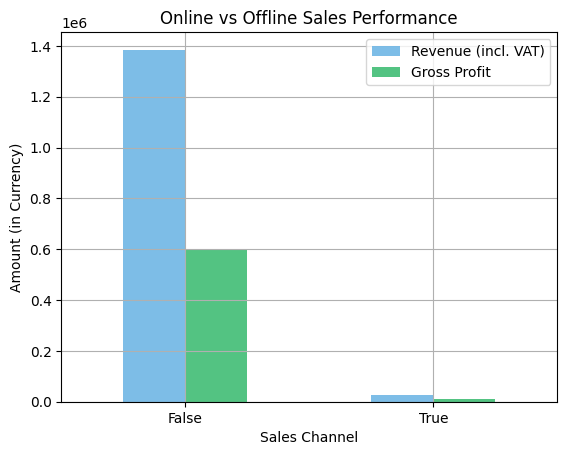

,Revenue (incl. VAT),Gross Profit,Units Sold
Online Sale,,,
False,1385049.61,602648.93,18243.0
True,28206.05,10533.06,402.0


In [118]:
# Aggregate revenue and gross profit by online/offline sales
online_offline_performance = sales_2017_2024_clean.groupby('Online Sale').agg({
    'Revenue (incl. VAT)': 'sum',
    'Gross Profit': 'sum',
    'Units Sold': 'sum'
}).sort_values(by='Revenue (incl. VAT)', ascending=False)

# Plotting the revenue, gross profit, and units sold for online vs offline sales
plt.figure(figsize=(12, 6))
online_offline_performance[['Revenue (incl. VAT)', 'Gross Profit']].plot(kind='bar', color=['#5DADE2', '#28B463'], alpha=0.8)
plt.title('Online vs Offline Sales Performance')
plt.xlabel('Sales Channel')
plt.ylabel('Amount (in Currency)')
plt.xticks(rotation=0)
plt.legend(['Revenue (incl. VAT)', 'Gross Profit'])
plt.grid(True)
plt.show()

online_offline_performance


### 4.10 Product Category and Subcategory Analysis

In [119]:
# Product Category/Subcategory Analysis

# Grouping data by Product Category and Subcategory
category_subcategory_analysis = sales_2017_2024_clean.groupby(['Product Category', 'Product Subcategory']).agg({
    'Revenue (incl. VAT)': 'sum',
    'Gross Profit': 'sum',
    'Units Sold': 'sum',
    'Profit Margin (%)': 'mean'
}).reset_index()

In [120]:
# Sorting the data by total revenue for better visualization
category_subcategory_analysis = category_subcategory_analysis.sort_values(by='Revenue (incl. VAT)', ascending=False)

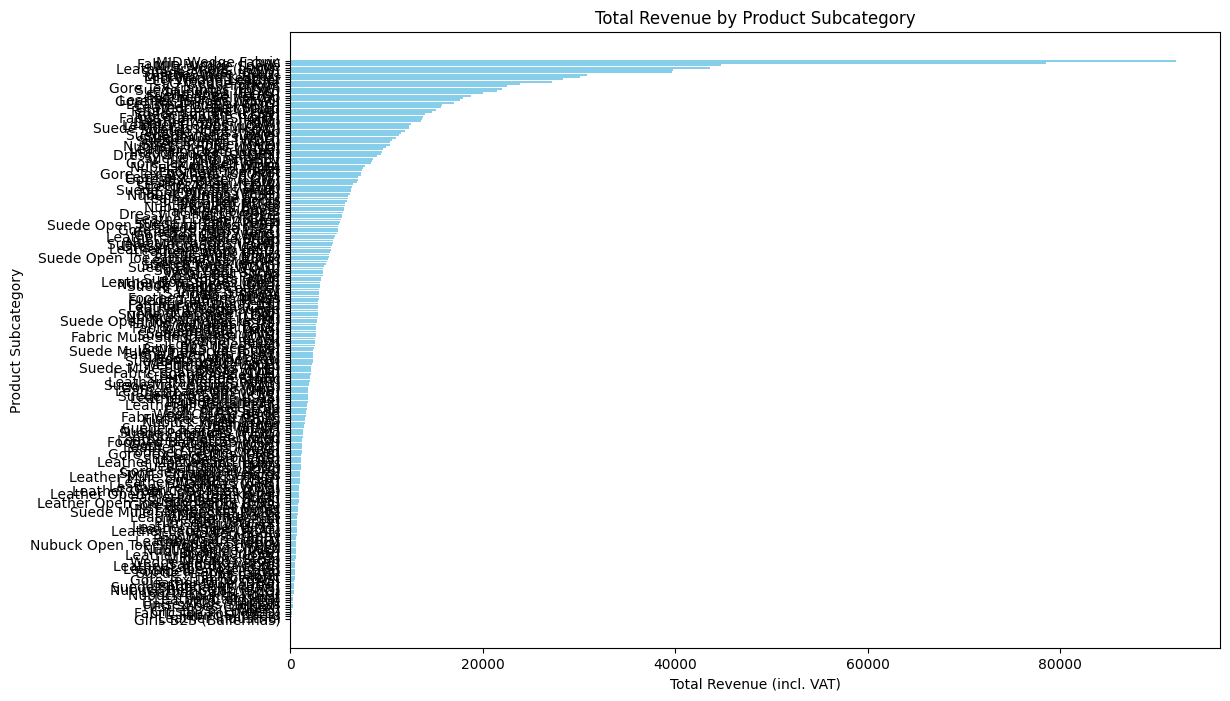

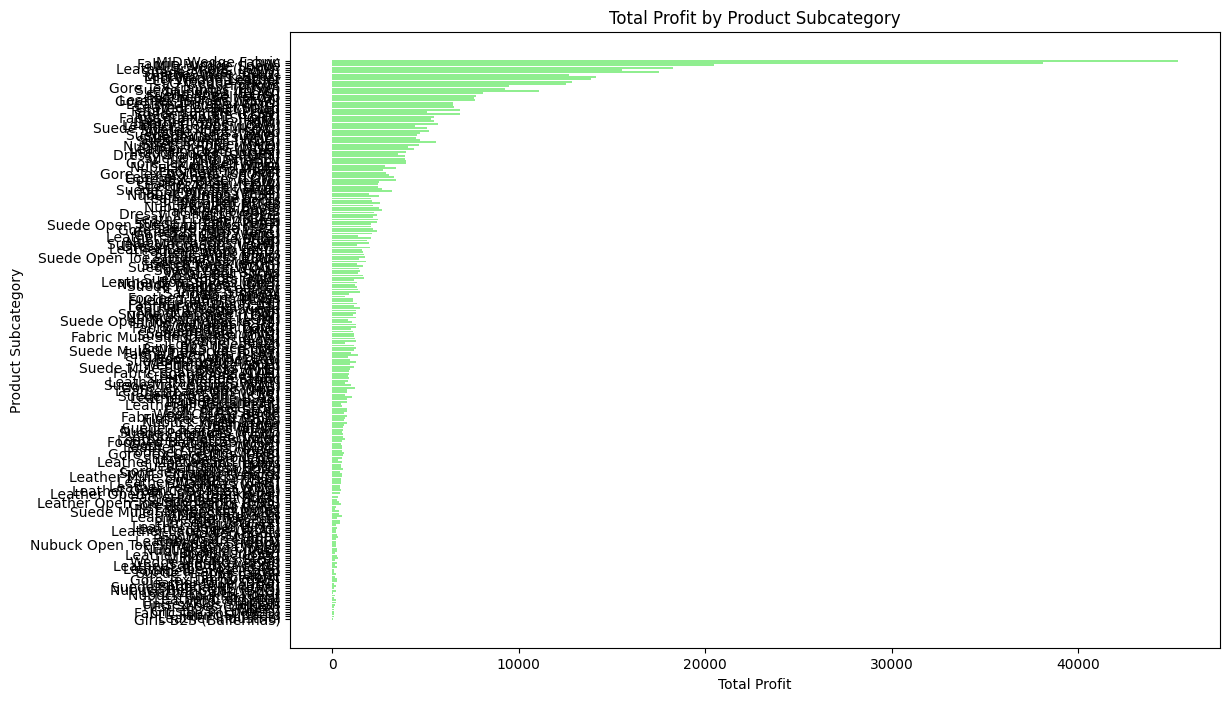

,Product Category,Product Subcategory,Revenue (incl. VAT),Gross Profit,Units Sold,Profit Margin (%)
122,Womens Espadrilles,MID Wedge Fabric,91982.27,45346.21,1908.0,0.578378
161,Womens Shoes,Fabric Pumps (LOW),78523.00,38140.74,1257.0,0.572467
124,Womens Espadrilles,MID Wedge Suede,44719.88,20460.14,720.0,0.510358
228,Womens Sneakers,Leather Trainers (LOW),43616.84,18274.23,318.0,0.486485
101,Womens Boots,Suede Ankle (LOW),39750.15,15556.44,385.0,0.393358
...,...,...,...,...,...,...
30,Mens Sandals,Fabric Toe Post (BED),205.00,100.54,5.0,0.570190
58,Unisex Kids Footwear,Fabric Slippers,205.00,105.10,9.0,0.458467
54,Unisex Adult Boots,Leather Industrial,170.00,64.67,1.0,0.456483
5,Boys Footwear,Sandals (velcro),146.00,73.00,3.0,0.500000


In [121]:
# Plotting Total Revenue by Category/Subcategory
plt.figure(figsize=(12, 8))
plt.barh(category_subcategory_analysis['Product Subcategory'], 
         category_subcategory_analysis['Revenue (incl. VAT)'], 
         color='skyblue')
plt.xlabel('Total Revenue (incl. VAT)')
plt.ylabel('Product Subcategory')
plt.title('Total Revenue by Product Subcategory')
plt.gca().invert_yaxis()
plt.show()

# Plotting Total Profit by Category/Subcategory
plt.figure(figsize=(12, 8))
plt.barh(category_subcategory_analysis['Product Subcategory'], 
         category_subcategory_analysis['Gross Profit'], 
         color='lightgreen')
plt.xlabel('Total Profit')
plt.ylabel('Product Subcategory')
plt.title('Total Profit by Product Subcategory')
plt.gca().invert_yaxis()
plt.show()

category_subcategory_analysis

As there are too many categories the histogram is very cluttered. So, let's have a look at the top and bottom 20 product categories.

In [122]:
# Grouping the data by 'Product Subcategory' to calculate total revenue per subcategory
category_subcategory_analysis = sales_2017_2024_clean.groupby('Product Subcategory').agg({
    'Revenue (incl. VAT)': 'sum'
}).reset_index().sort_values(by='Revenue (incl. VAT)', ascending=False)

In [123]:
# Getting the top and bottom 20 subcategories
top_20_subcategories = category_subcategory_analysis.head(20)
bottom_20_subcategories = category_subcategory_analysis.tail(20)

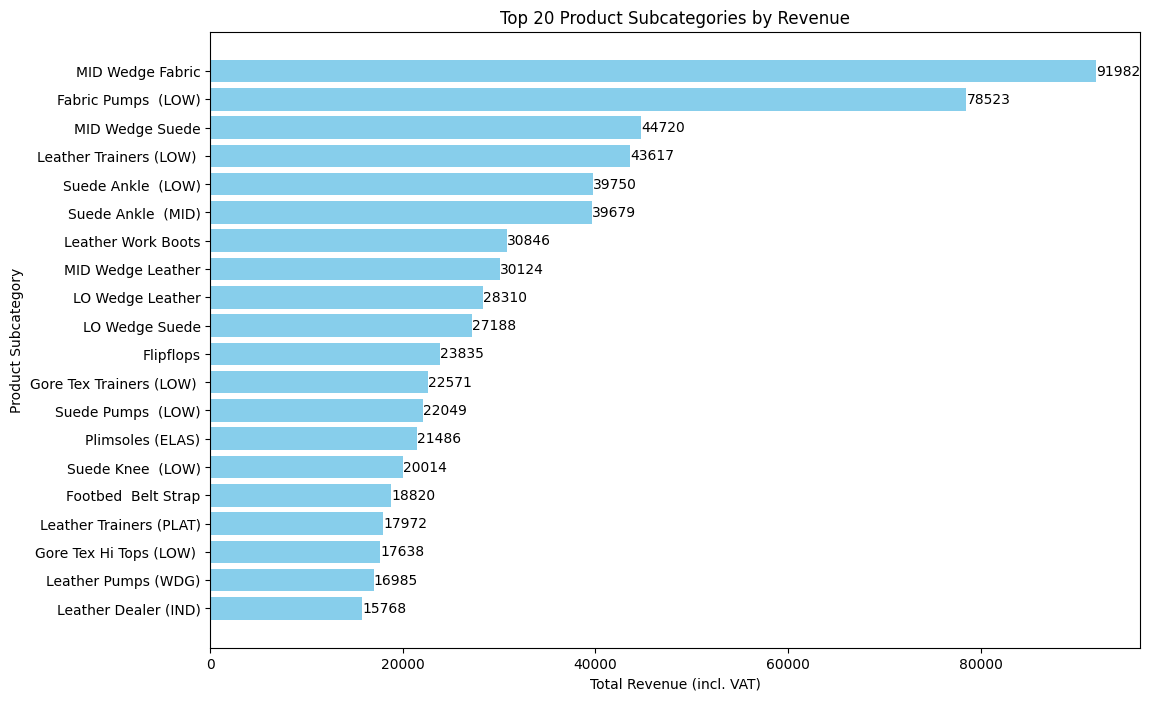

In [124]:
# Re-plotting with values rounded to the nearest whole number

# Plotting Top 20 Product Subcategories by Revenue
plt.figure(figsize=(12, 8))
bars = plt.barh(top_20_subcategories['Product Subcategory'], 
         top_20_subcategories['Revenue (incl. VAT)'], 
         color='skyblue')
plt.xlabel('Total Revenue (incl. VAT)')
plt.ylabel('Product Subcategory')
plt.title('Top 20 Product Subcategories by Revenue')
plt.gca().invert_yaxis()

# Adding the value on each bar rounded to the nearest whole number
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width()), 
             va='center', ha='left')
    
plt.show()

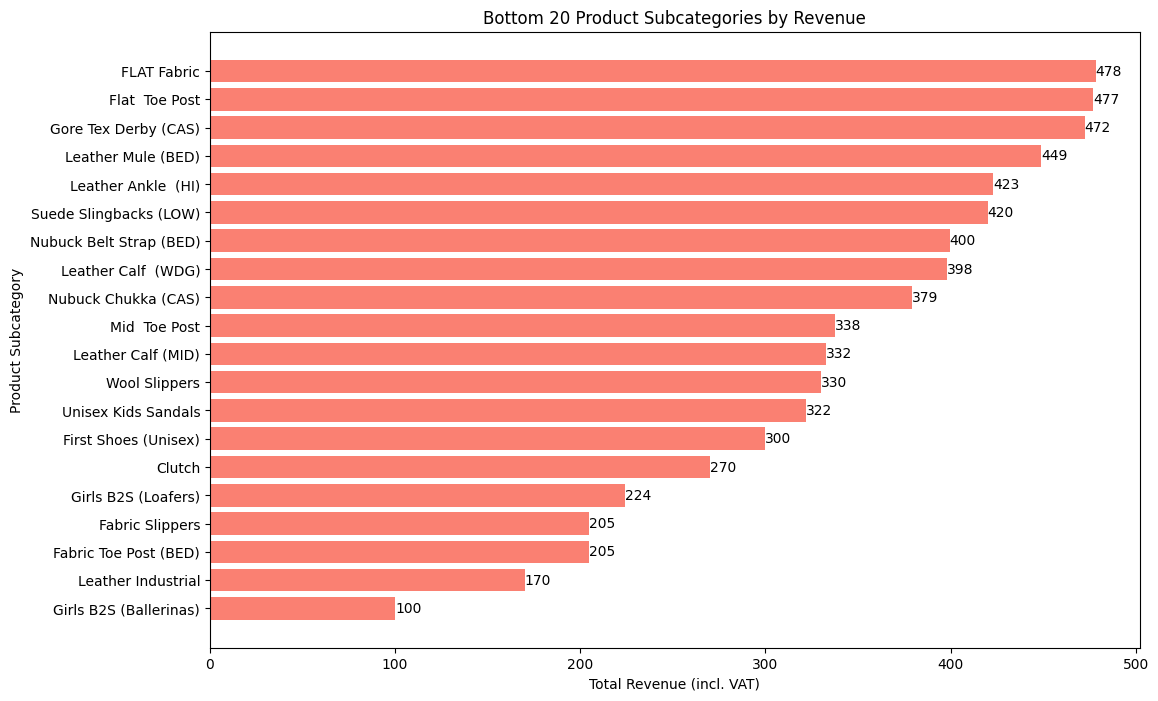

In [125]:
# Plotting Bottom 20 Product Subcategories by Revenue
plt.figure(figsize=(12, 8))
bars = plt.barh(bottom_20_subcategories['Product Subcategory'], 
         bottom_20_subcategories['Revenue (incl. VAT)'], 
         color='salmon')
plt.xlabel('Total Revenue (incl. VAT)')
plt.ylabel('Product Subcategory')
plt.title('Bottom 20 Product Subcategories by Revenue')
plt.gca().invert_yaxis()

# Adding the value on each bar rounded to the nearest whole number
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, round(bar.get_width()), 
             va='center', ha='left')

plt.show()



### 4.11 Total Number of Products Sold Per Year

In [126]:
# Convert 'Transaction Date' to datetime and extract the year
sales_2017_2024_clean['Transaction Date'] = pd.to_datetime(sales_2017_2024_clean['Transaction Date'])
sales_2017_2024_clean['Year'] = sales_2017_2024_clean['Transaction Date'].dt.year

# Aggregate data by year
yearly_summary = sales_2017_2024_clean.groupby('Year').agg(
    Total_Units_Sold=('Units Sold', 'sum'),
    Total_Revenue=('Revenue (incl. VAT)', 'sum'),
    Total_Gross_Profit=('Gross Profit', 'sum'),
    Avg_Profit_Margin=('Profit Margin (%)', 'mean'),
    Avg_Markup=('Markup', 'mean'),
    Total_Online_Sales=('Online Sale', 'sum')
).reset_index()

yearly_summary

,Year,Total_Units_Sold,Total_Revenue,Total_Gross_Profit,Avg_Profit_Margin,Avg_Markup,Total_Online_Sales
0,2017,1965.0,144136.03,66407.20,0.513781,1.274830,0
1,2018,2844.0,213062.12,95654.42,0.538704,1.579469,0
2,2019,2903.0,216390.54,101872.86,0.543501,1.583752,0
3,2020,1710.0,124476.55,54125.61,0.505427,1.254694,0
4,2021,2178.0,146702.81,59292.48,0.451907,0.979176,144
5,2022,2650.0,204545.07,82758.05,0.444705,0.977271,132
6,2023,2522.0,209996.96,88126.91,0.460082,1.055580,72
7,2024,1873.0,153945.58,64944.46,0.484739,1.119215,54


In [127]:
# Extract the month from the 'Transaction Date'
sales_2017_2024_clean['Month'] = sales_2017_2024_clean['Transaction Date'].dt.month

# Aggregate data by year and month
monthly_summary = sales_2017_2024_clean.groupby(['Year', 'Month']).agg(
    Total_Units_Sold=('Units Sold', 'sum'),
    Total_Revenue=('Revenue (incl. VAT)', 'sum'),
    Total_Gross_Profit=('Gross Profit', 'sum'),
    Avg_Profit_Margin=('Profit Margin (%)', 'mean'),
    Avg_Markup=('Markup', 'mean'),
    Total_Online_Sales=('Online Sale', 'sum')
).reset_index()
monthly_summary.head()


,Year,Month,Total_Units_Sold,Total_Revenue,Total_Gross_Profit,Avg_Profit_Margin,Avg_Markup,Total_Online_Sales
0,2017,3,88.0,6676.25,3171.59,0.575123,1.370409,0
1,2017,4,245.0,16661.32,7978.18,0.566079,1.381468,0
2,2017,5,283.0,17632.80,8081.06,0.493799,1.237835,0
3,2017,6,364.0,21311.64,9480.13,0.459869,1.126502,0
4,2017,7,304.0,17786.09,8380.14,0.566039,1.347529,0


In [128]:
# Aggregate data by year and product category/subcategory
category_summary = sales_2017_2024_clean.groupby(['Year', 'Product Category', 'Product Subcategory']).agg(
    Total_Units_Sold=('Units Sold', 'sum'),
    Total_Revenue=('Revenue (incl. VAT)', 'sum'),
    Total_Gross_Profit=('Gross Profit', 'sum'),
    Avg_Profit_Margin=('Profit Margin (%)', 'mean'),
    Avg_Markup=('Markup', 'mean'),
    Total_Online_Sales=('Online Sale', 'sum')
).reset_index()

category_summary.head()


,Year,Product Category,Product Subcategory,Total_Units_Sold,Total_Revenue,Total_Gross_Profit,Avg_Profit_Margin,Avg_Markup,Total_Online_Sales
0,2017,Womens Boots,Boots (Ankle) Low,3.0,699.00,291.30,0.487815,1.012016,0
1,2017,Womens Boots,Fabric Biker Boots,3.0,525.00,235.59,0.538504,1.166865,0
2,2017,Womens Boots,Gore Tex Calf (LOW),23.0,3306.00,1857.93,0.674115,2.071271,0
3,2017,Womens Boots,Leather Ankle (LOW),10.0,1352.98,645.48,0.573276,1.355860,0
4,2017,Womens Boots,Leather Ankle (MID),10.0,1321.45,568.44,0.497468,1.058333,0


### 4.12 Time Periods covered


Let's first start with what periods the data is covering. The column containing the dates currently has 'object' data type, so I would need to convert it to datetime format.

In [129]:
sales_2017_2024_clean['Transaction Date'] = pd.to_datetime(sales_2017_2024_clean['Transaction Date'], format='%d/%m/%Y %H:%M:%S')

Let's confirm it.

In [130]:
print(sales_2017_2024_clean['Transaction Date'].dtype)

datetime64[ns]


The column now has correct datetime type, so we can proceed with checking the period the data covers.

In [131]:
# Find the minimum and maximum dates in the 'Transaction Date' column
sales_2017_2024_clean['Transaction Date'].min()

Timestamp('2017-03-11 11:56:45')

In [132]:
sales_2017_2024_clean['Transaction Date'].max()

Timestamp('2024-07-15 12:05:33')

The data available is from 11th March, 2017 to 15th July, 2024. However, it appears that the data for 15th July, 2024 is incomplete.

### 4.13 Busiest Day

In [133]:
# Convert 'Transaction Date' to datetime format and extract the day of the week
sales_2017_2024_clean['Transaction Date'] = pd.to_datetime(sales_2017_2024_clean['Transaction Date'], format='%d/%m/%Y %H:%M:%S')
sales_2017_2024_clean['Day of Week'] = sales_2017_2024_clean['Transaction Date'].dt.day_name()

# Define a function to process branch data and calculate day of week counts
def calculate_day_counts(branch_name, exclude_sundays=False):
    branch_data = sales_2017_2024_clean[sales_2017_2024_clean['Branch Name'] == branch_name]
    if exclude_sundays:
        branch_data = branch_data[branch_data['Day of Week'] != 'Sunday']
    return branch_data['Day of Week'].value_counts().sort_index()

# Calculate the total number of transactions for each day of the week for both branches
barnes_day_counts = calculate_day_counts('Barnes')
haslemere_day_counts = calculate_day_counts('Haslemere')

# Calculate the total number of transactions excluding Sundays
barnes_day_counts_no_sundays = calculate_day_counts('Barnes', exclude_sundays=True)
haslemere_day_counts_no_sundays = calculate_day_counts('Haslemere', exclude_sundays=True)

barnes_day_counts_no_sundays


Day of Week
Friday       2884
Monday       2352
Saturday     4294
Thursday     2879
Tuesday      2742
Wednesday    2831
Name: count, dtype: int64

In [134]:
haslemere_day_counts_no_sundays

Day of Week
Friday       86
Monday       50
Saturday     97
Thursday     66
Tuesday      42
Wednesday    61
Name: count, dtype: int64

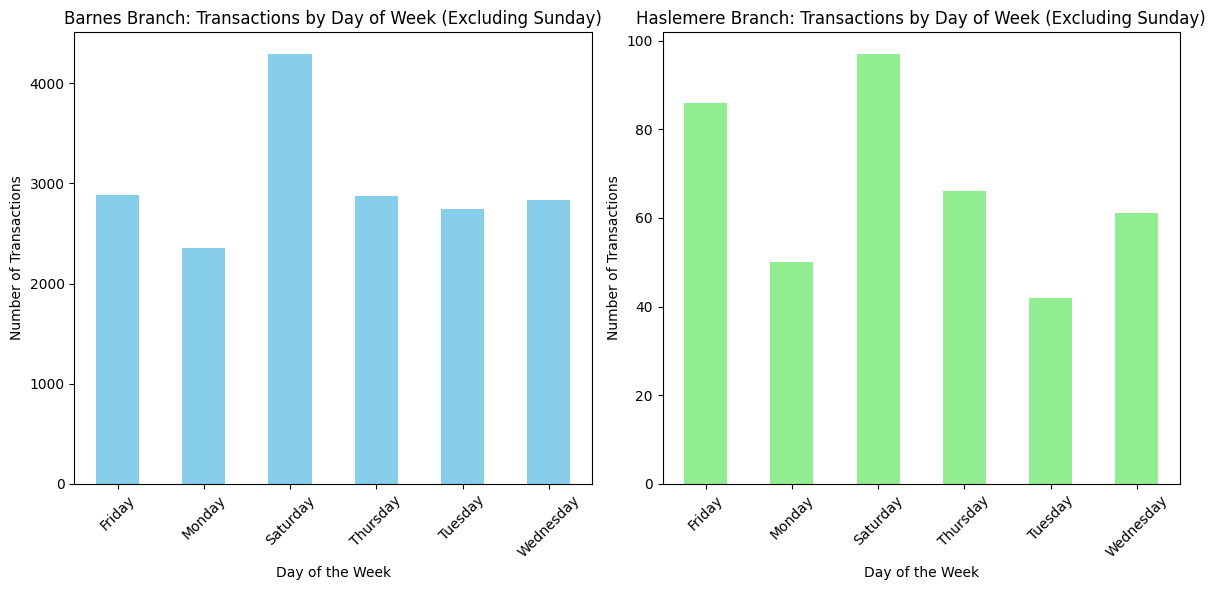

In [137]:
import matplotlib.pyplot as plt

# Set up the figure and axis
plt.figure(figsize=(12, 6))

# Plot for Barnes Branch
plt.subplot(1, 2, 1)
barnes_day_counts_no_sundays.plot(kind='bar', color='skyblue')
plt.title('Barnes Branch: Transactions by Day of Week (Excluding Sunday)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

# Plot for Haslemere Branch
plt.subplot(1, 2, 2)
haslemere_day_counts_no_sundays.plot(kind='bar', color='lightgreen')
plt.title('Haslemere Branch: Transactions by Day of Week (Excluding Sunday)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


**Barnes Branch**

Busiest Day: Saturday (4,294 transactions)

Quietest Day: Monday (2,352 transactions)

**Haslemere Branch**

Busiest Day: Saturday (97 transactions)

Quietest Day: Tuesday (42 transactions)

For the Barnes branch, Saturday is the busiest day, and Monday is identified as the quietest day.

For the Haslemere branch, Saturday is still the busiest day, while Tuesday is the quietest.

### 4.14 Best Selling Products on Saturday

Since Saturday is the busiest day for both shops, let's have a look at the top products sold on Saturday.

In [146]:
# Define a function to filter data for transactions on a specific day of the week
def filter_by_day(branch_data, day):
    return branch_data[branch_data['Day of Week'] == day]

# Define a function to get top-selling products for a specific day
def top_selling_products(branch_name, day, top_n=10):
    branch_data = sales_2017_2024_clean[sales_2017_2024_clean['Branch Name'] == branch_name]
    branch_data_no_sundays = branch_data[branch_data['Day of Week'] != 'Sunday']
    day_sales = filter_by_day(branch_data_no_sundays, day)
    return day_sales.groupby('Product Description')['Units Sold'].sum().sort_values(ascending=False).head(top_n)

# Get top-selling products on Saturdays for both branches
barnes_top_products_saturday = top_selling_products('Barnes', 'Saturday')
haslemere_top_products_saturday = top_selling_products('Haslemere', 'Saturday')

barnes_top_products_saturday

Product Description
Tulip 3275                        118.0
17 Ter Linen                       98.0
Ter Linen                          84.0
Elly Tennis Laceless Plimsoles     74.0
Etna Leather                       54.0
Comfy Room Socks                   44.0
18 Cheerful                        41.0
19 Ter Linen                       40.0
19 Cheerful 01                     39.0
17 Tarbes Linen                    38.0
Name: Units Sold, dtype: float64

In [145]:
haslemere_top_products_saturday

Product Description
Tulip 3275                 11.0
1915 Inglesa 106623         7.0
Rain Coat 71                5.0
Etna Leather                4.0
1915 Re Edition 1176100     3.0
6589 Sandals                3.0
Tulip 3373                  3.0
Barcelona 109200            3.0
Glyndbourne 28028           3.0
Jute Platform Trainer       2.0
Name: Units Sold, dtype: float64

** Summary**

Barnes Branch: The Tulip 3275 product is the best-selling on Saturdays, with 118 units sold, followed by 17 Ter Linen and Ter Linen.

Haslemere Branch: The Tulip 3275 also tops the sales on Saturdays, though with fewer units (11), followed by 1915 Inglesa 106623.

### 4.15 Busiest and Quetest Time Intervals

In [150]:
# Extract the hour of the day from the transaction timestamps
sales_2017_2024_clean['Hour of Day'] = sales_2017_2024_clean['Transaction Date'].dt.hour

# Separate the data by branch
barnes_data = sales_2017_2024_clean[sales_2017_2024_clean['Branch Name'] == 'Barnes']
haslemere_data = sales_2017_2024_clean[sales_2017_2024_clean['Branch Name'] == 'Haslemere']

# Group the data by hour and calculate the number of transactions for each hour
barnes_hourly_sales = barnes_data.groupby('Hour of Day')['Transaction Date'].count()
haslemere_hourly_sales = haslemere_data.groupby('Hour of Day')['Transaction Date'].count()

barnes_hourly_sales, haslemere_hourly_sales


(Hour of Day
 0       23
 1        6
 2        4
 3        9
 4        2
 5       19
 6       10
 7       25
 8       56
 9       83
 10     720
 11    1917
 12    2512
 13    2466
 14    2342
 15    2499
 16    2466
 17    1857
 18     778
 19     121
 20     102
 21      77
 22      94
 23      46
 Name: Transaction Date, dtype: int64,
 Hour of Day
 10     1
 11    37
 12    64
 13    74
 14    53
 15    58
 16    61
 17    39
 18    15
 Name: Transaction Date, dtype: int64)

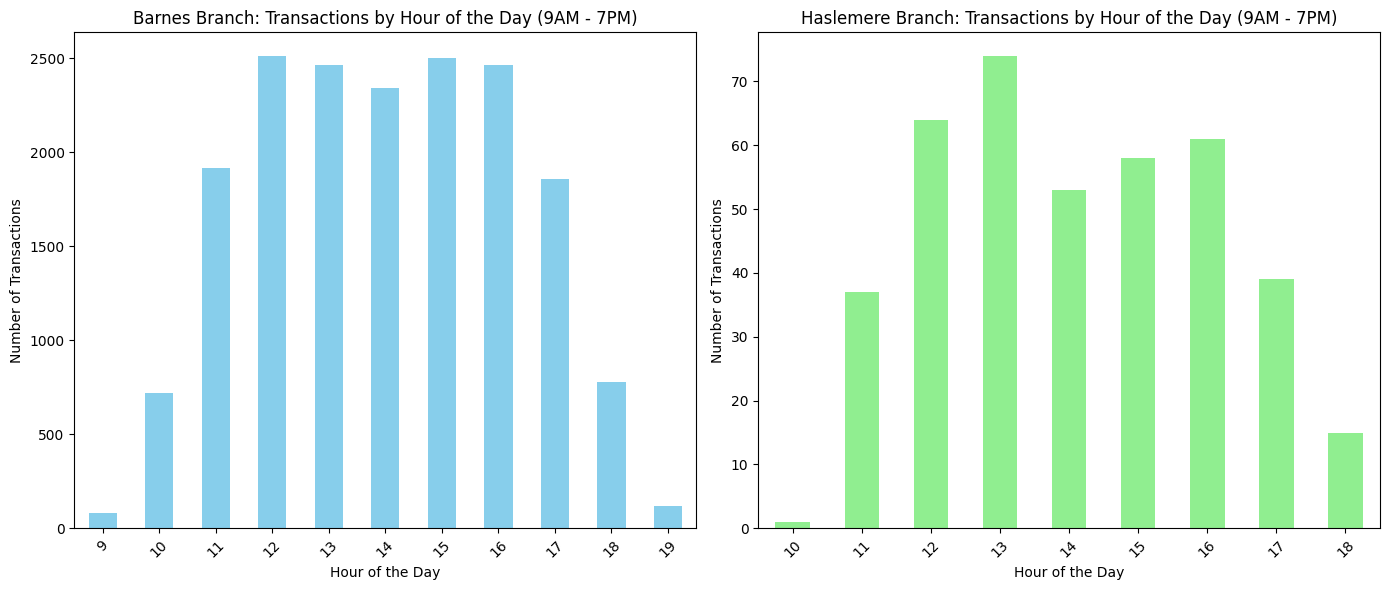

In [151]:
# Filter the data to only include transactions between 9AM and 7PM
barnes_hourly_sales_filtered = barnes_hourly_sales[(barnes_hourly_sales.index >= 9) & (barnes_hourly_sales.index <= 19)]
haslemere_hourly_sales_filtered = haslemere_hourly_sales[(haslemere_hourly_sales.index >= 9) & (haslemere_hourly_sales.index <= 19)]

# Set up the figure and axis
plt.figure(figsize=(14, 6))

# Plot for Barnes Branch
plt.subplot(1, 2, 1)
barnes_hourly_sales_filtered.plot(kind='bar', color='skyblue')
plt.title('Barnes Branch: Transactions by Hour of the Day (9AM - 7PM)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

# Plot for Haslemere Branch
plt.subplot(1, 2, 2)
haslemere_hourly_sales_filtered.plot(kind='bar', color='lightgreen')
plt.title('Haslemere Branch: Transactions by Hour of the Day (9AM - 7PM)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


Barnes Branch: The bar chart shows the number of transactions by hour of the day. The busiest period is around midday, particularly from 12:00 PM to 1:00 PM, while the quietest is in the early morning hours, specifically from 4:00 AM to 5:00 AM.

Haslemere Branch: The chart illustrates that the busiest time is in the early afternoon from 1:00 PM to 2:00 PM, with the quietest hour being from 10:00 AM to 11:00 AM.

In [154]:
# Extract the time from the transaction timestamps and round down to the nearest 15-minute interval
sales_2017_2024_clean['15 Min Interval'] = sales_2017_2024_clean['Transaction Date'].dt.floor('15T')

# Group the data by these 15-minute intervals and count the number of transactions for each interval
interval_sales = sales_2017_2024_clean.groupby(sales_2017_2024_clean['15 Min Interval'].dt.time)['Transaction Date'].count()

# Sorting the intervals for clarity
interval_sales_sorted = interval_sales.sort_index()

# Find the busiest and quietest intervals
busiest_interval = interval_sales_sorted.idxmax(), interval_sales_sorted.max()
quietest_interval = interval_sales_sorted.idxmin(), interval_sales_sorted.min()

interval_sales_sorted, busiest_interval, quietest_interval


(15 Min Interval
 00:00:00     8
 00:15:00     6
 00:30:00     8
 00:45:00     1
 01:00:00     2
             ..
 22:45:00    20
 23:00:00    30
 23:15:00     7
 23:30:00     5
 23:45:00     4
 Name: Transaction Date, Length: 90, dtype: int64,
 (datetime.time(15, 0), 696),
 (datetime.time(0, 45), 1))

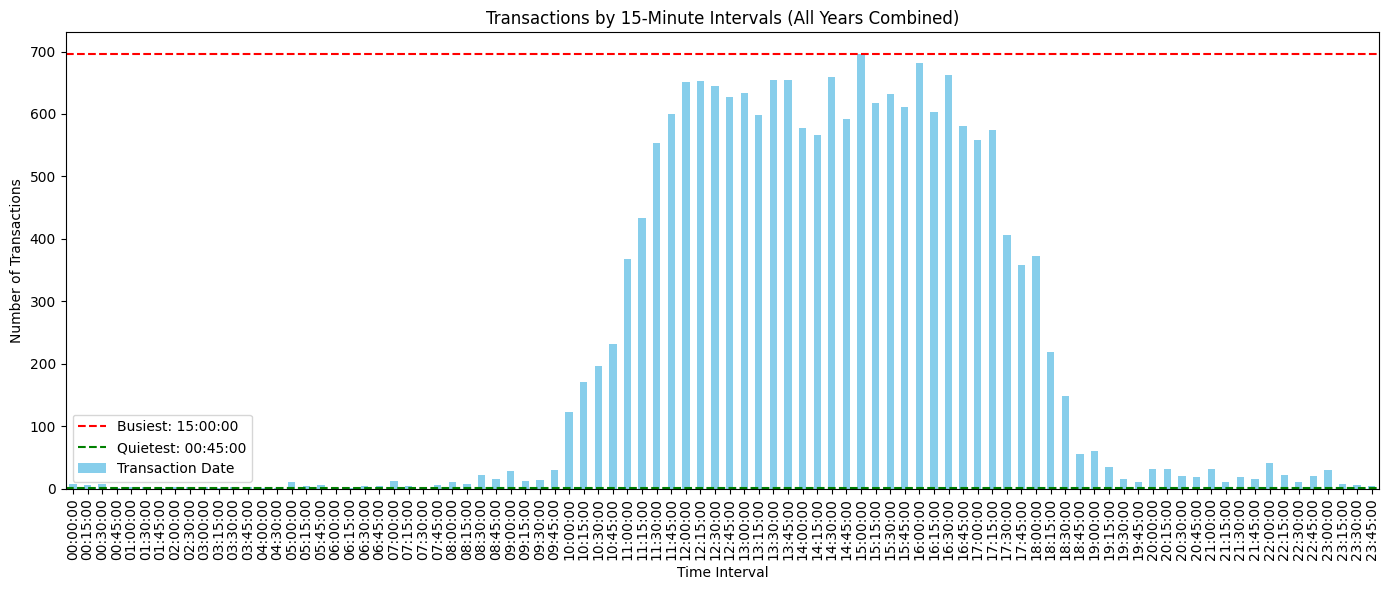

In [155]:
# Set up the figure and axis
plt.figure(figsize=(14, 6))

# Plot the 15-minute interval transaction counts
interval_sales_sorted.plot(kind='bar', color='skyblue')
plt.axhline(y=busiest_interval[1], color='red', linestyle='--', label=f'Busiest: {busiest_interval[0]}')
plt.axhline(y=quietest_interval[1], color='green', linestyle='--', label=f'Quietest: {quietest_interval[0]}')

# Highlight the busiest and quietest intervals
plt.title('Transactions by 15-Minute Intervals (All Years Combined)')
plt.xlabel('Time Interval')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [157]:
# Filter the data for the time intervals between 9AM and 7PM
filtered_data = sales_2017_2024_clean[(sales_2017_2024_clean['Transaction Date'].dt.time >= pd.to_datetime('09:00').time()) &
                     (sales_2017_2024_clean['Transaction Date'].dt.time <= pd.to_datetime('19:00').time())]

# Separate the data by branch
barnes_filtered = filtered_data[filtered_data['Branch Name'] == 'Barnes']
haslemere_filtered = filtered_data[filtered_data['Branch Name'] == 'Haslemere']

# Group by 15-minute intervals and count the transactions for each branch
barnes_interval_sales = barnes_filtered.groupby(barnes_filtered['15 Min Interval'].dt.time)['Transaction Date'].count().sort_index()
haslemere_interval_sales = haslemere_filtered.groupby(haslemere_filtered['15 Min Interval'].dt.time)['Transaction Date'].count().sort_index()

# Find the busiest and quietest intervals for each branch
barnes_busiest_interval = barnes_interval_sales.idxmax(), barnes_interval_sales.max()
barnes_quietest_interval = barnes_interval_sales.idxmin(), barnes_interval_sales.min()

haslemere_busiest_interval = haslemere_interval_sales.idxmax(), haslemere_interval_sales.max()
haslemere_quietest_interval = haslemere_interval_sales.idxmin(), haslemere_interval_sales.min()


(15 Min Interval
 09:00:00     28
 09:15:00     12
 09:30:00     14
 09:45:00     29
 10:00:00    123
 10:15:00    170
 10:30:00    196
 10:45:00    231
 11:00:00    366
 11:15:00    421
 11:30:00    546
 11:45:00    584
 12:00:00    642
 12:15:00    629
 12:30:00    625
 12:45:00    616
 13:00:00    607
 13:15:00    581
 13:30:00    639
 13:45:00    639
 14:00:00    558
 14:15:00    557
 14:30:00    647
 14:45:00    580
 15:00:00    687
 15:15:00    602
 15:30:00    616
 15:45:00    594
 16:00:00    663
 16:15:00    591
 16:30:00    644
 16:45:00    568
 17:00:00    550
 17:15:00    561
 17:30:00    393
 17:45:00    353
 18:00:00    362
 18:15:00    213
 18:30:00    148
 18:45:00     55
 Name: Transaction Date, dtype: int64,
 15 Min Interval
 10:45:00     1
 11:00:00     1
 11:15:00    13
 11:30:00     7
 11:45:00    16
 12:00:00     9
 12:15:00    24
 12:30:00    20
 12:45:00    11
 13:00:00    26
 13:15:00    18
 13:30:00    15
 13:45:00    15
 14:00:00    19
 14:15:00     9
 14:30:

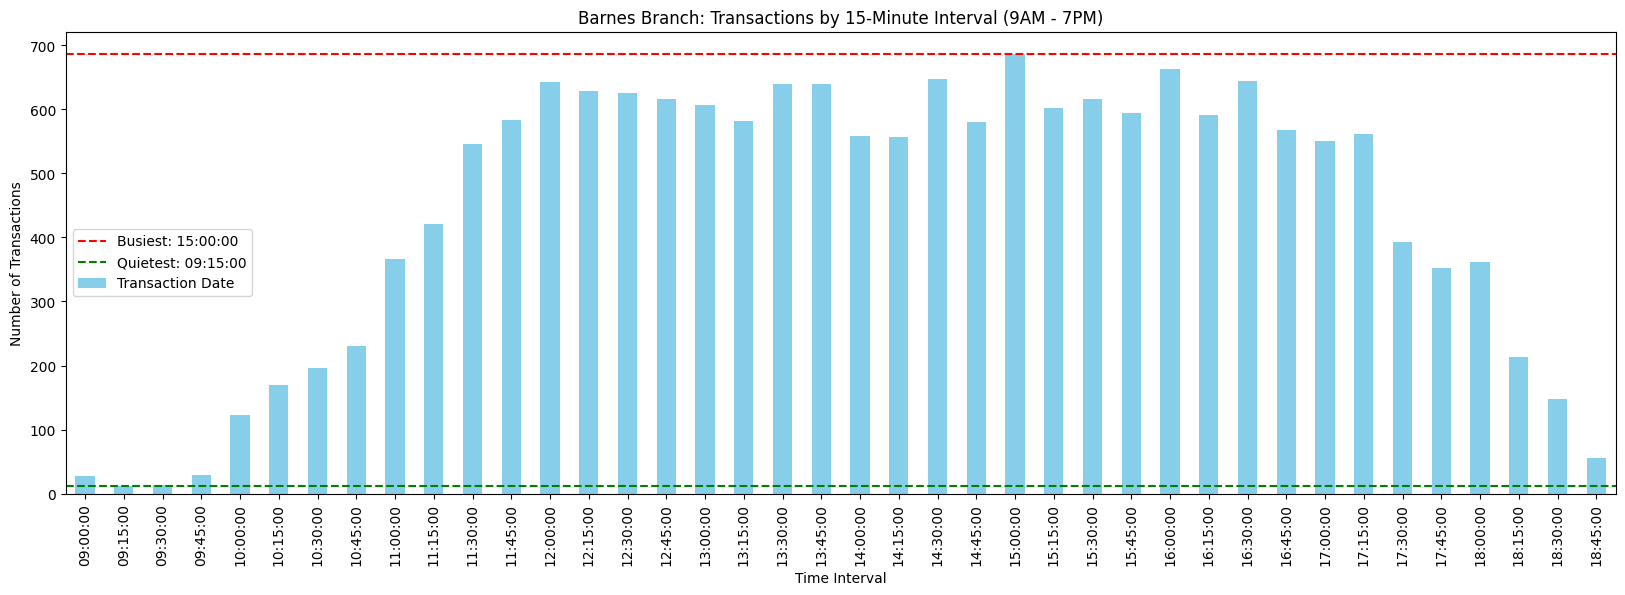

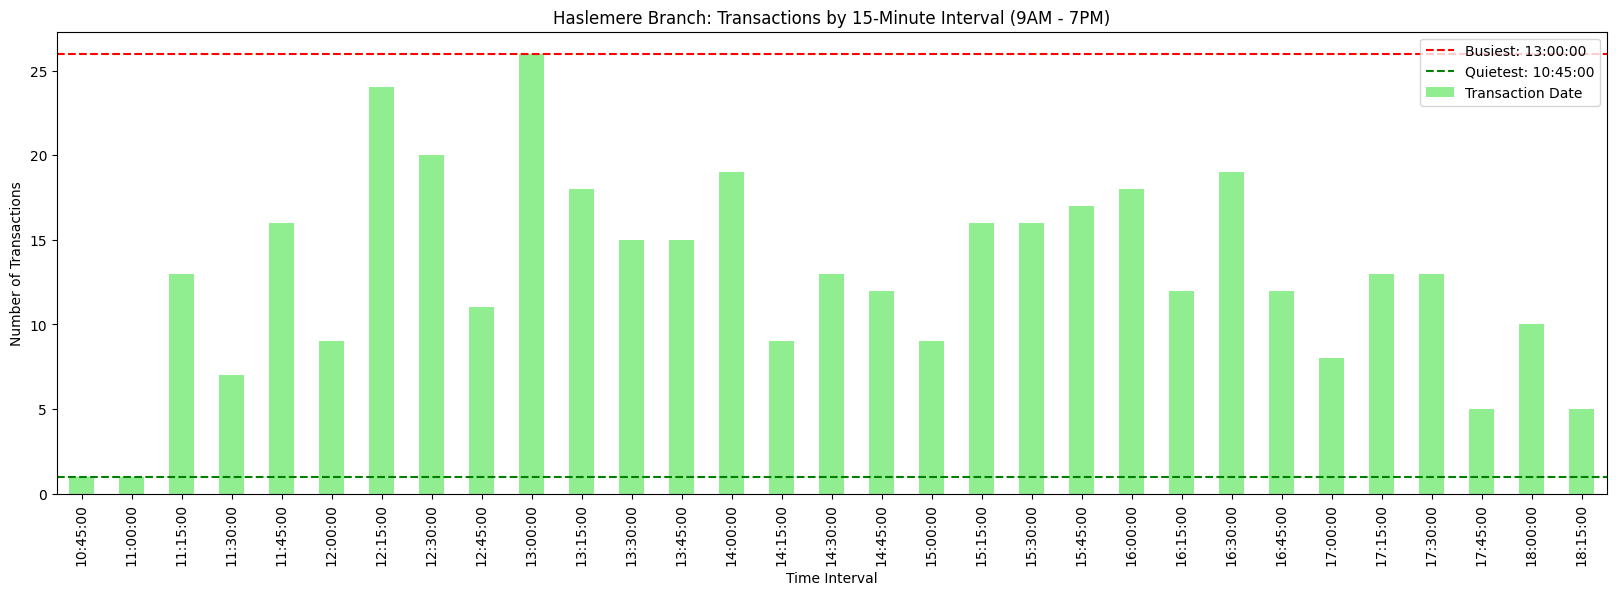

In [163]:
# Plot for Barnes Branch
plt.figure(figsize=(20, 6))
barnes_interval_sales.plot(kind='bar', color='skyblue')
plt.axhline(y=barnes_busiest_interval[1], color='red', linestyle='--', label=f'Busiest: {barnes_busiest_interval[0]}')
plt.axhline(y=barnes_quietest_interval[1], color='green', linestyle='--', label=f'Quietest: {barnes_quietest_interval[0]}')
plt.title('Barnes Branch: Transactions by 15-Minute Interval (9AM - 7PM)')
plt.xlabel('Time Interval')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# Plot for Haslemere Branch
plt.figure(figsize=(20, 6))
haslemere_interval_sales.plot(kind='bar', color='lightgreen')
plt.axhline(y=haslemere_busiest_interval[1], color='red', linestyle='--', label=f'Busiest: {haslemere_busiest_interval[0]}')
plt.axhline(y=haslemere_quietest_interval[1], color='green', linestyle='--', label=f'Quietest: {haslemere_quietest_interval[0]}')
plt.title('Haslemere Branch: Transactions by 15-Minute Interval (9AM - 7PM)')
plt.xlabel('Time Interval')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.legend()
plt.show()


Barnes Branch:

The busiest interval is from 3:00 PM to 3:15 PM, highlighted in red.
The quietest interval is from 9:15 AM to 9:30 AM, highlighted in green.

Haslemere Branch:
The busiest interval is from 1:00 PM to 1:15 PM, marked in red.
The quietest interval is from 10:45 AM to 11:00 AM, marked in green.